### MachineLearning VenPayCoffeeCappTransByPlatformInstantKpis

In [1]:
import os
import sys
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

sys.path.insert(1, r'C:\Users\AdebanjiAdelowo\OneDrive - N-and Group Ltd\Documents\N-ANDITALIA\Private')
import securitydetail

warnings.filterwarnings('ignore')

In [2]:
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server =  securitydetail.server
database =  securitydetail.database 
username = securitydetail.username
password = securitydetail.password    

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

### CoffeeCappTransByPlatformInstantKpis

In [3]:

query = """
        SELECT  *
        FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
        """

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,1,2022-11-30 13:45:00,1,BiTX-OD,387,327,29,14,17,0
1,2,2022-11-30 13:45:00,2,MobilePay,684,578,29,68,9,0
2,3,2022-11-30 13:45:00,3,MobilePayStage,0,0,0,0,0,0
3,4,2022-11-30 13:45:00,4,MobilePaySpain,0,0,0,0,0,0
4,5,2022-11-30 13:45:00,5,MobilePayFrance,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
691282,711268,2023-10-12 08:35:00,4,MobilePaySpain,0,0,0,0,0,0
691283,711269,2023-10-12 08:35:00,5,MobilePayFrance,0,0,0,0,0,0
691284,711270,2023-10-12 08:35:00,6,MobilePay-CPI,206,164,1,41,0,0
691285,711271,2023-10-12 08:35:00,7,Coges,278,254,1,7,16,0


In [4]:
df_CoffeeCappTransByPlatform.where(df_CoffeeCappTransByPlatform['SystemErrorsCounter'] != 0).dropna()

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
9870,9871.0,2022-12-05 11:15:00,1.0,BiTX-OD,153.0,114.0,6.0,8.0,4.0,21.0
9871,9872.0,2022-12-05 11:15:00,2.0,MobilePay,404.0,281.0,46.0,36.0,11.0,30.0
9872,9873.0,2022-12-05 11:15:00,3.0,MobilePayStage,0.0,0.0,0.0,0.0,0.0,4.0
9873,9874.0,2022-12-05 11:15:00,4.0,MobilePaySpain,0.0,0.0,0.0,0.0,0.0,4.0
9874,9875.0,2022-12-05 11:15:00,5.0,MobilePayFrance,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
678738,698724.0,2023-10-06 21:55:00,4.0,MobilePaySpain,0.0,0.0,0.0,0.0,0.0,9.0
678739,698725.0,2023-10-06 21:55:00,5.0,MobilePayFrance,0.0,0.0,0.0,0.0,0.0,9.0
678740,698726.0,2023-10-06 21:55:00,6.0,MobilePay-CPI,18.0,4.0,0.0,2.0,3.0,9.0
678741,698727.0,2023-10-06 21:55:00,7.0,Coges,16.0,4.0,0.0,0.0,6.0,6.0


In [5]:
# drop all categorical features

cat_features= ["PK_CoffeeCappTransByPlatformInstantKpisId", "ReferenceDate", "EK_PlatformId", "PlatformName"]
df_coffee_cont_feat = df_CoffeeCappTransByPlatform.drop(cat_features, axis=1)
df_coffee_cont_feat

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,387,327,29,14,17,0
1,684,578,29,68,9,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
691282,0,0,0,0,0,0
691283,0,0,0,0,0,0
691284,206,164,1,41,0,0
691285,278,254,1,7,16,0


In [6]:
cat_features= ["PK_CoffeeCappTransByPlatformInstantKpisId", "ReferenceDate", "EK_PlatformId"]
df_coffee_cont_feat = df_CoffeeCappTransByPlatform.drop(cat_features, axis=1)

In [7]:
df_coffee_cont_feat

,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,BiTX-OD,387,327,29,14,17,0
1,MobilePay,684,578,29,68,9,0
2,MobilePayStage,0,0,0,0,0,0
3,MobilePaySpain,0,0,0,0,0,0
4,MobilePayFrance,0,0,0,0,0,0
...,...,...,...,...,...,...,...
691282,MobilePaySpain,0,0,0,0,0,0
691283,MobilePayFrance,0,0,0,0,0,0
691284,MobilePay-CPI,206,164,1,41,0,0
691285,Coges,278,254,1,7,16,0


In [8]:
df_coffee_cont_feat.groupby('PlatformName').mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
PlatformName,,,,,,
BiTX-OD,175.682826,155.386104,4.991830,8.191012,7.060189,0.103786
Coges,62.993436,49.269278,2.125480,3.057792,8.514256,0.077012
MobilePay,349.556368,267.602725,16.832232,51.885153,13.121147,0.165052
MobilePay-CPI,60.195411,48.167801,2.188252,8.989521,0.831462,0.069799
MobilePayFrance,0.000000,0.000000,0.000000,0.000000,0.000000,0.069799
MobilePaySpain,0.000000,0.000000,0.000000,0.000000,0.000000,0.069799
MobilePayStage,0.303100,0.000000,0.014371,0.286727,0.002001,0.069799
Pickio,0.022632,0.012532,0.001390,0.000037,0.008672,0.088624


In [9]:
df_nonzerotrans = df_coffee_cont_feat.where(df_coffee_cont_feat['TotalTransactionsCounter']!=0).dropna()
df_nonzerotrans.groupby('PlatformName').mean()

,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
PlatformName,,,,,,
BiTX-OD,175.715671,155.415155,4.992764,8.192544,7.061509,0.103805
Coges,63.150362,49.392015,2.130775,3.065409,8.535466,0.077204
MobilePay,349.567899,267.611552,16.832787,51.886864,13.121580,0.165058
MobilePay-CPI,60.295520,48.247907,2.191892,9.004472,0.832845,0.069915
MobilePayStage,2.027657,0.000000,0.096138,1.918132,0.013387,0.065759
Pickio,1.767143,0.978571,0.108571,0.002857,0.677143,0.085714


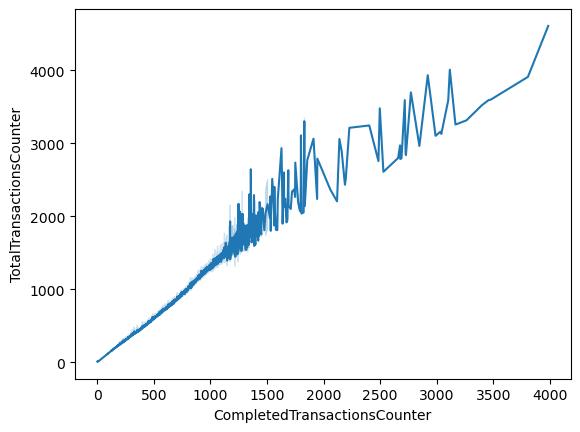

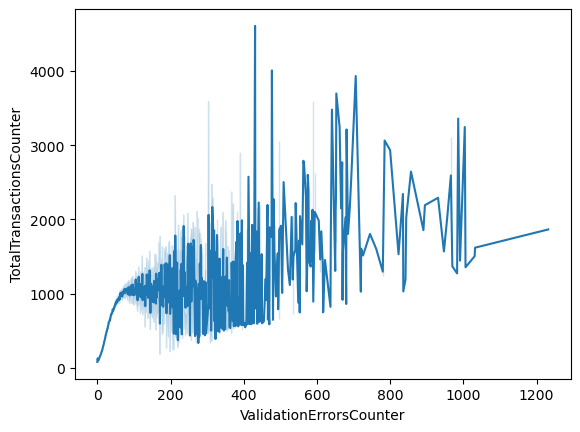

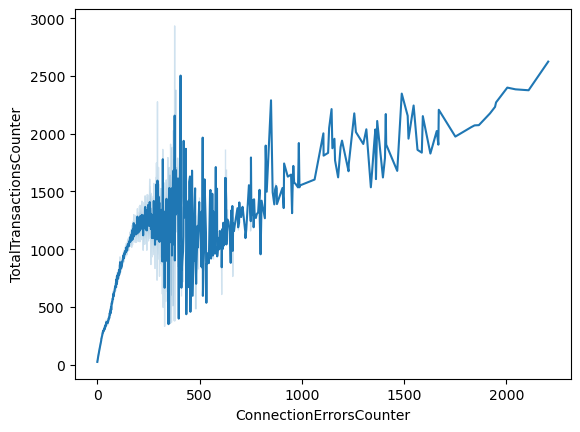

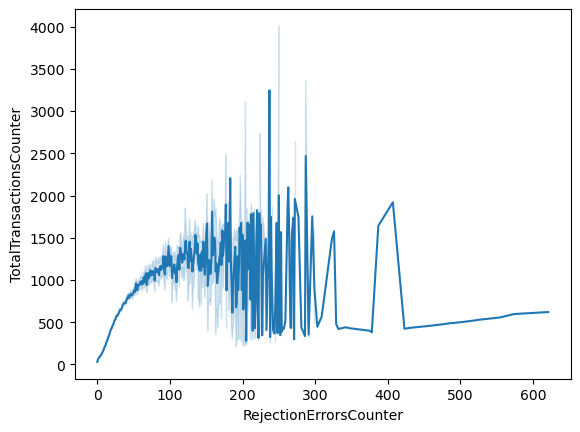

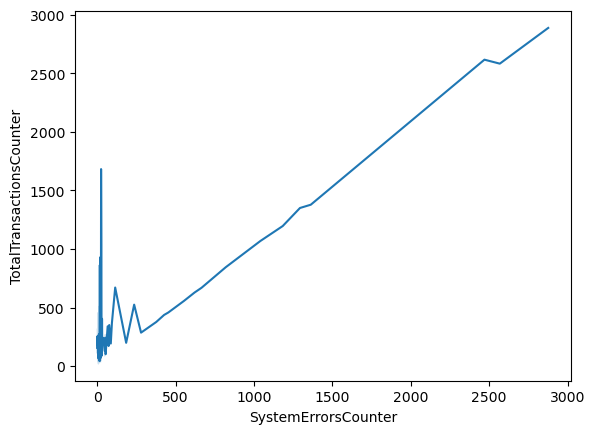

In [10]:
for i, col in enumerate(['CompletedTransactionsCounter', 'ValidationErrorsCounter', 'ConnectionErrorsCounter', 'RejectionErrorsCounter', 'SystemErrorsCounter']):
    plt.figure(i)
    sns.lineplot(x=col, y='TotalTransactionsCounter', data=df_nonzerotrans)

### Split train, validation and test set

In [11]:
features = df_nonzerotrans.drop(['PlatformName','TotalTransactionsCounter'], axis=1)
target = df_nonzerotrans['TotalTransactionsCounter']

In [12]:
features.head()

,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,327.0,29.0,14.0,17.0,0.0
1,578.0,29.0,68.0,9.0,0.0
5,97.0,2.0,6.0,5.0,0.0
6,58.0,3.0,7.0,13.0,0.0
7,344.0,35.0,30.0,7.0,0.0


In [13]:
target.head()

0    387.0
1    684.0
5    110.0
6     81.0
7    416.0
Name: TotalTransactionsCounter, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [15]:
print(len(target), len(y_train), len(y_val), len(y_test))

377686 226611 75538 75537


### Linear Regression Model

In [16]:
model = LinearRegression()

### Cross Validation

In [17]:
scores = cross_val_score(model, features, target.values.ravel(), cv=5)

In [18]:
scores

array([0.99999992, 0.99635423, 0.99999991, 0.99988287, 0.99995969])

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_predict = model.predict(X_test)

In [21]:
y_test

429112    1119.0
531837      52.0
476798       1.0
11676      581.0
130080      26.0
           ...  
242187     233.0
439912     141.0
36832        7.0
83937      120.0
501032     104.0
Name: TotalTransactionsCounter, Length: 75537, dtype: float64

In [22]:
y_predict

array([1.11909192e+03, 5.19503184e+01, 9.55573297e-01, ...,
       6.95497067e+00, 1.19948684e+02, 1.03945336e+02])

In [23]:
mean_squared_error(y_test, y_predict)

1.9049517465300656

In [24]:
df_CoffeeCappTransByPlatform.groupby('PlatformName').sum()

,PK_CoffeeCappTransByPlatformInstantKpisId,EK_PlatformId,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
PlatformName,,,,,,,,
BiTX-OD,31383103319,90947,15977826,14131900,453992,744948,642103,9439
Coges,31383649001,636629,5729064,4480893,193306,278097,774346,7004
MobilePay,31383194266,181894,31791103,24337665,1530841,4718799,1193329,15011
MobilePay-CPI,31383558054,545682,5474592,4380717,199015,817570,75619,6348
MobilePayFrance,31383467107,454735,0,0,0,0,0,6348
MobilePaySpain,31383376160,363788,0,0,0,0,0,6348
MobilePayStage,31383285213,272841,27566,0,1307,26077,182,6348
Pickio,26489975600,437264,1237,685,76,2,474,4844


In [25]:
query = """
SELECT  [PlatformName]
        ,SUM([TotalTransactionsCounter]) AS TotalTransactionsCounter
        ,SUM([CompletedTransactionsCounter]) AS CompletedTransactionsCounter
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
--WHERE CompletedTransactionsCounter != 0
GROUP BY PlatformName
ORDER BY TotalTransactionsCounter DESC
"""

df_CoffeeCappTransByPlatformGroup = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformGroup

,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,MobilePay,31791103,24337665
1,BiTX-OD,15977826,14131900
2,Coges,5729064,4480893
3,MobilePay-CPI,5474592,4380717
4,MobilePayStage,27566,0
5,Pickio,1237,685
6,MobilePaySpain,0,0
7,MobilePayFrance,0,0


<Axes: xlabel='PlatformName'>

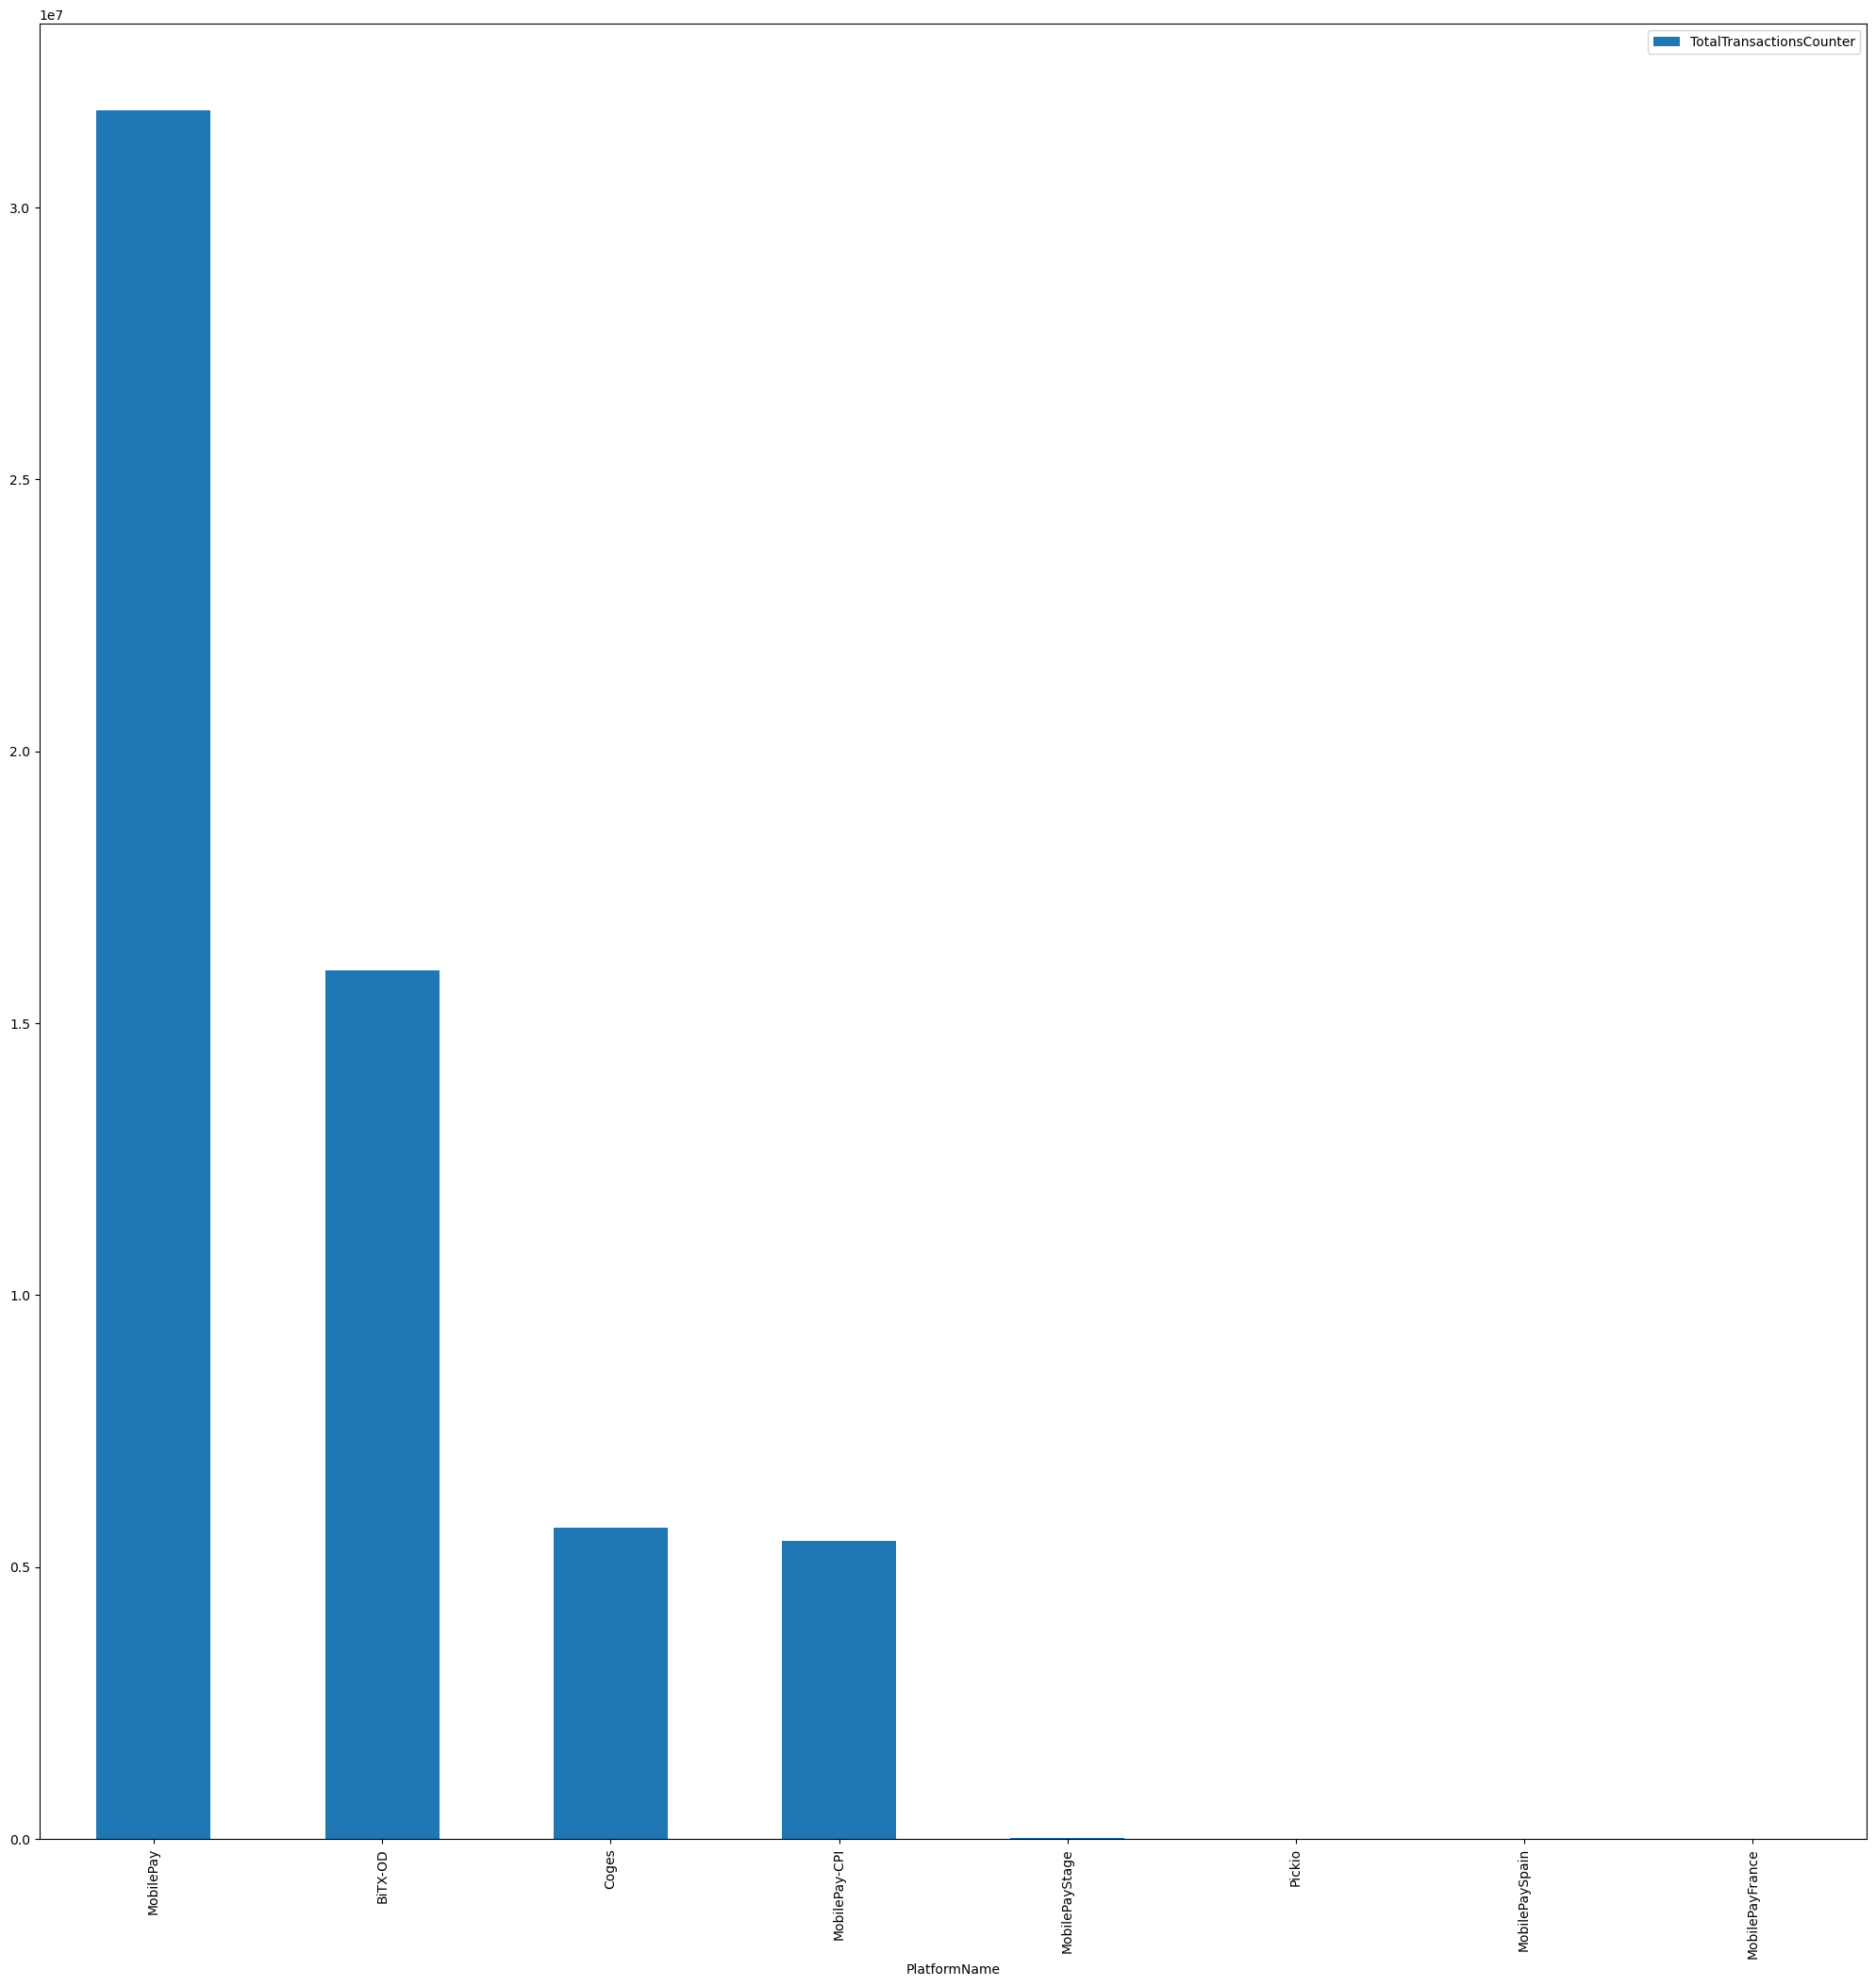

In [26]:
df_CoffeeCappTransByPlatformGroup.plot(
  kind="bar",
  x="PlatformName",     
  y="TotalTransactionsCounter",
  figsize=(25, 25)
  )

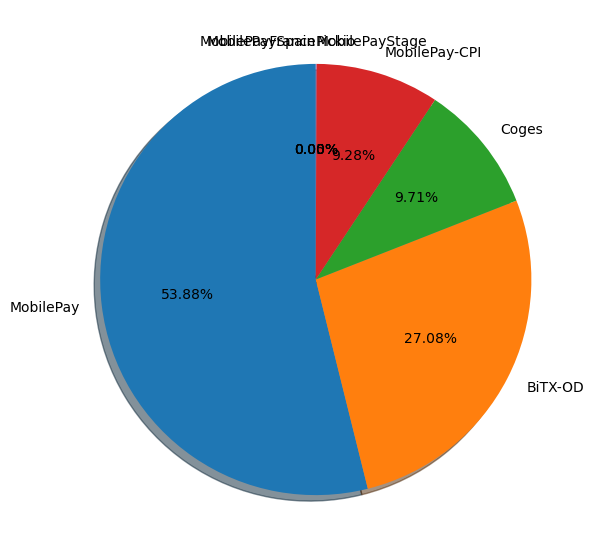

In [27]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_CoffeeCappTransByPlatformGroup['TotalTransactionsCounter'], labels = df_CoffeeCappTransByPlatformGroup['PlatformName'], startangle=90, shadow=True, autopct='%1.2f%%')
# show plot
plt.show()

<Axes: xlabel='PlatformName'>

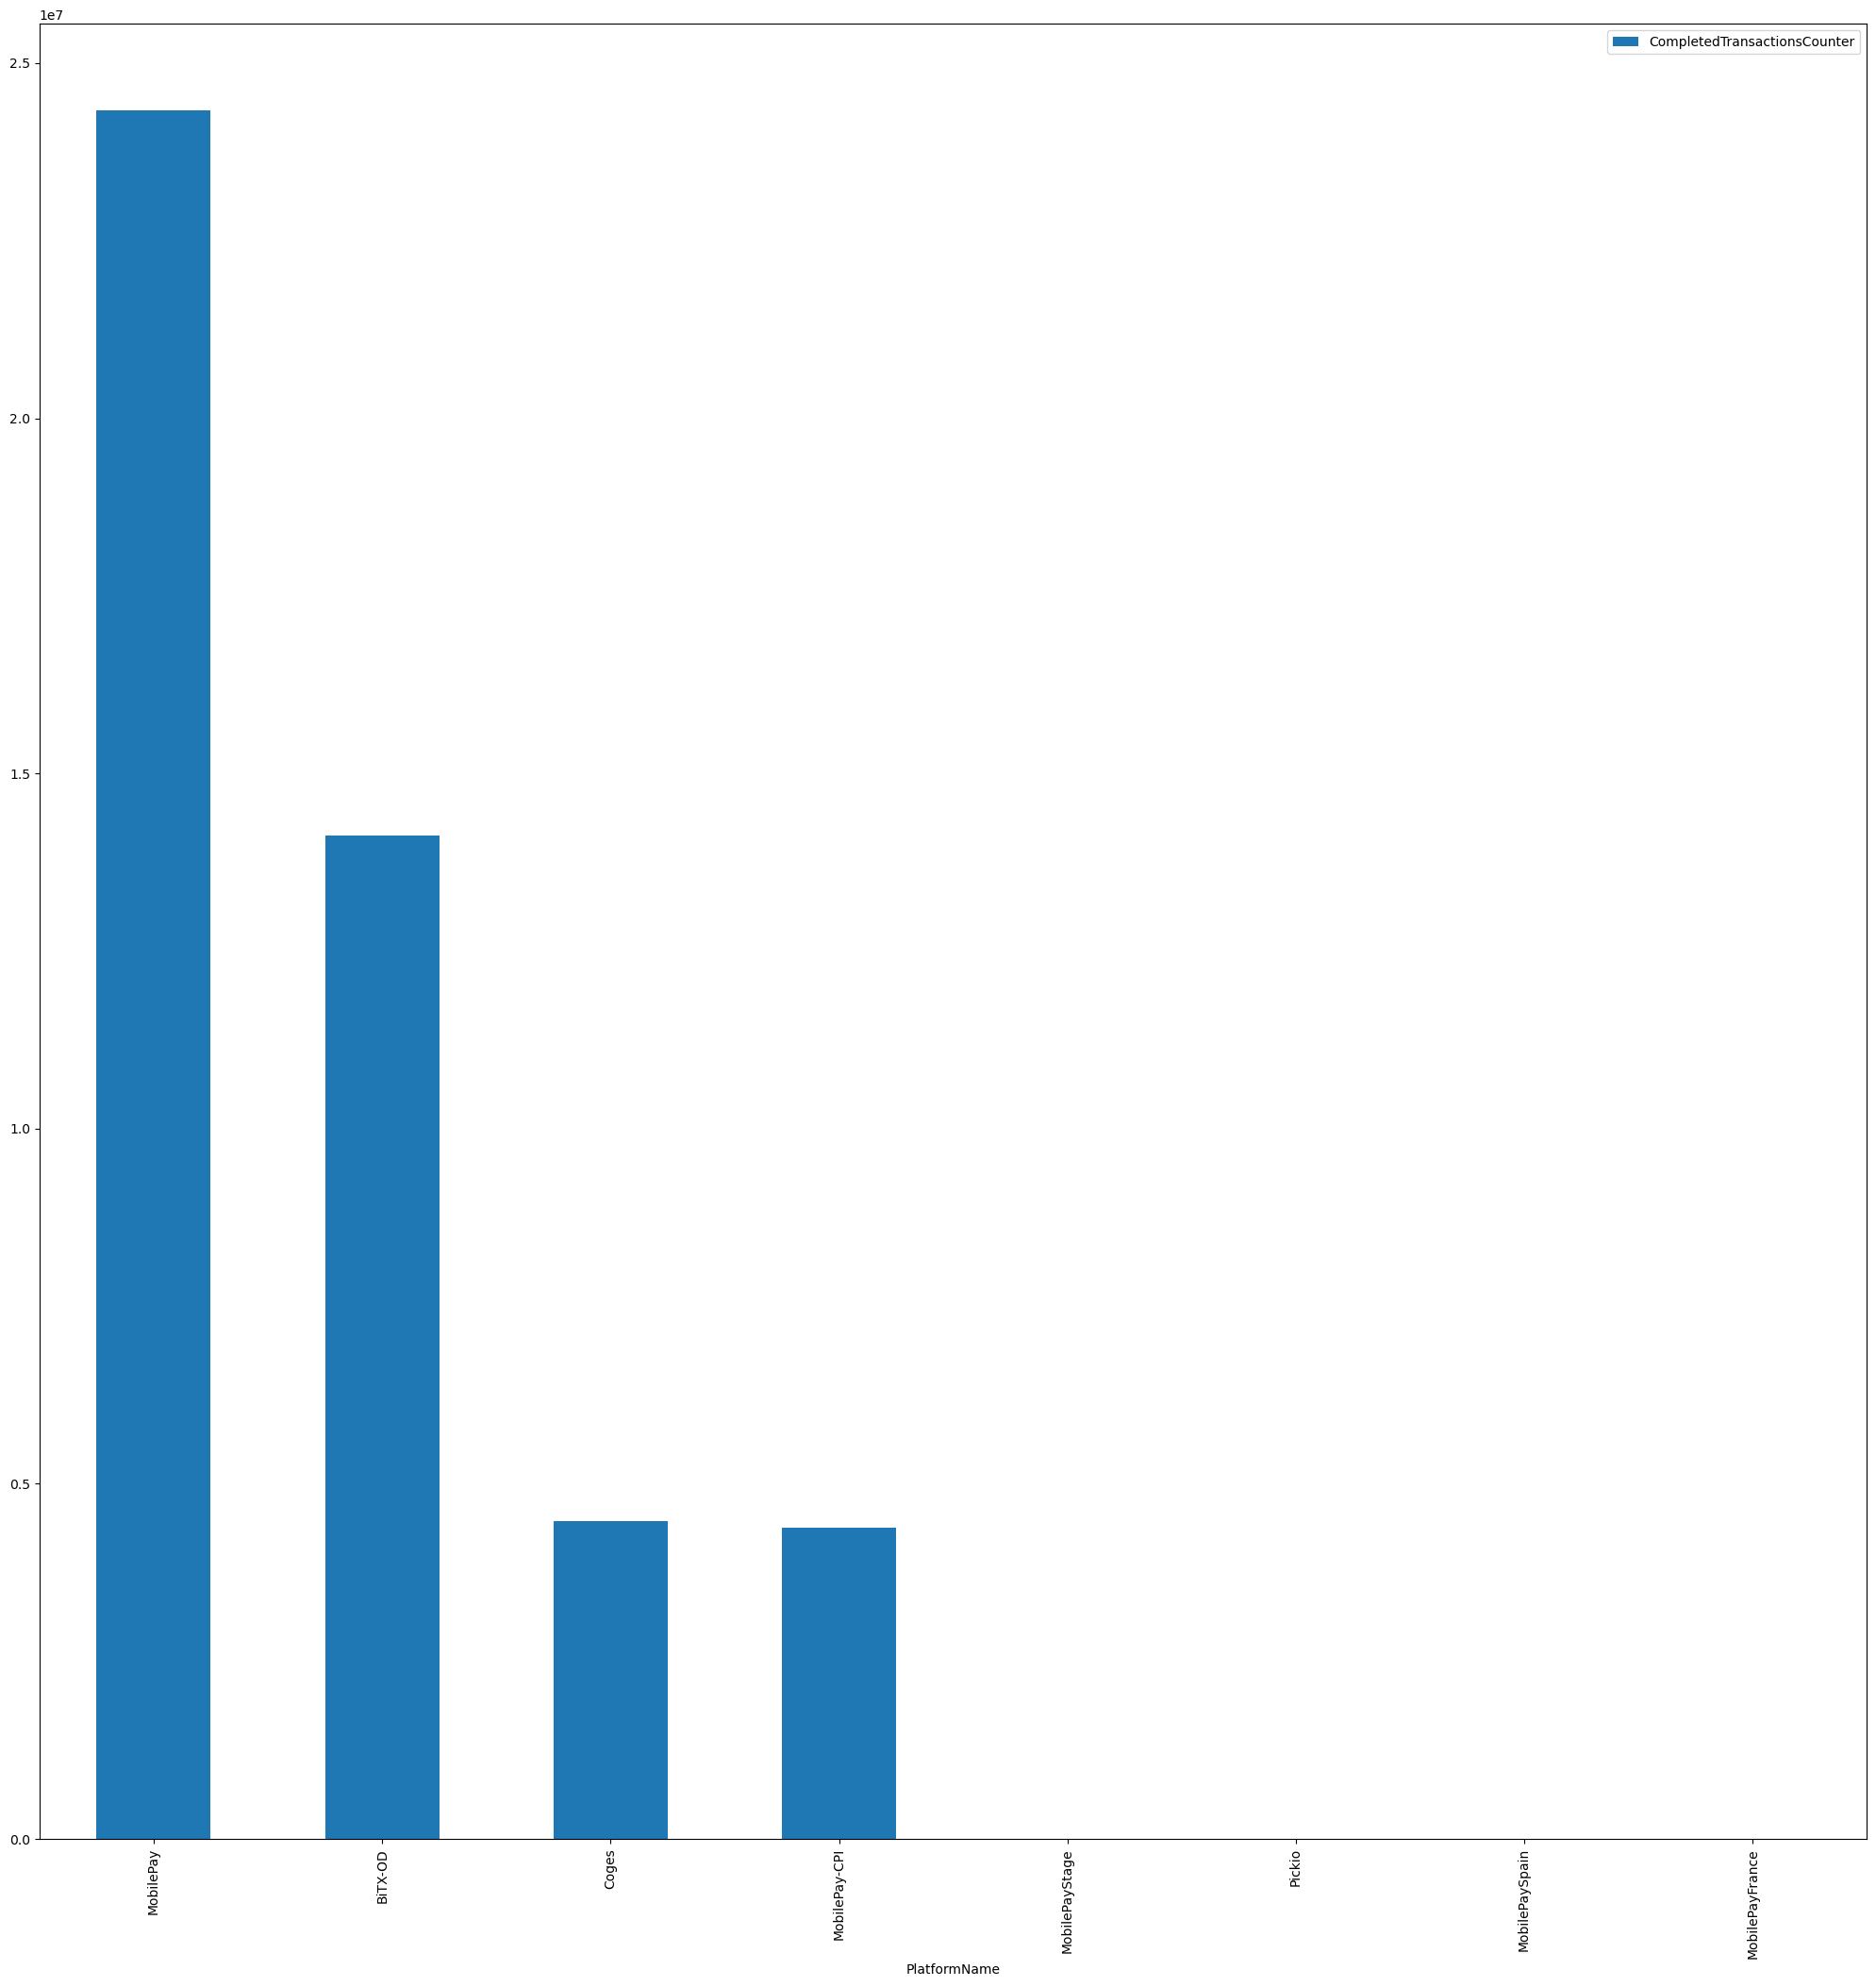

In [28]:
df_CoffeeCappTransByPlatformGroup.plot(
  kind="bar",
  x="PlatformName",     
  y="CompletedTransactionsCounter",
  figsize=(25, 25)
  )

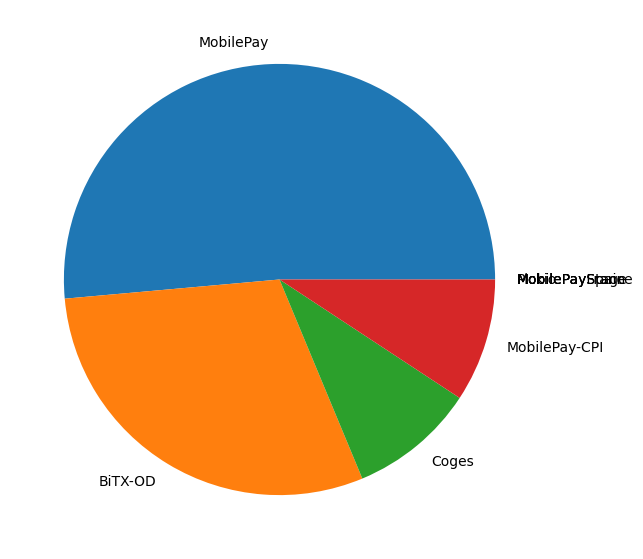

In [29]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_CoffeeCappTransByPlatformGroup['CompletedTransactionsCounter'], labels = df_CoffeeCappTransByPlatformGroup['PlatformName'])
 
# show plot
plt.show()

## Transactions by each Platform 

### BiTX-OD

In [30]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD'
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,1,2022-11-30 13:45:00,1,BiTX-OD,387,327
1,8,2022-11-30 13:50:00,1,BiTX-OD,416,344
2,15,2022-11-30 13:55:00,1,BiTX-OD,402,346
3,22,2022-11-30 14:00:00,1,BiTX-OD,408,335
4,29,2022-11-30 14:05:00,1,BiTX-OD,455,397
...,...,...,...,...,...,...
90942,706289,2023-10-10 04:45:00,1,BiTX-OD,179,169
90943,706297,2023-10-10 04:50:00,1,BiTX-OD,201,195
90944,706305,2023-10-10 04:55:00,1,BiTX-OD,240,222
90945,706313,2023-10-10 05:00:00,1,BiTX-OD,247,243


## Transactions by BiTX-OD in last month

In [31]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD' AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,625689,2023-09-05 05:10:00,1,BiTX-OD,199,194
1,625697,2023-09-05 05:15:00,1,BiTX-OD,182,167
2,625705,2023-09-05 05:20:00,1,BiTX-OD,215,212
3,625713,2023-09-05 05:25:00,1,BiTX-OD,226,216
4,625721,2023-09-05 05:30:00,1,BiTX-OD,244,228
...,...,...,...,...,...,...
8635,685057,2023-09-30 23:35:00,1,BiTX-OD,16,13
8636,685065,2023-09-30 23:40:00,1,BiTX-OD,8,8
8637,685073,2023-09-30 23:45:00,1,BiTX-OD,12,12
8638,685081,2023-09-30 23:50:00,1,BiTX-OD,5,5


In [32]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684129,2023-09-30 13:55:00,1,BiTX-OD,69,69
1,684137,2023-09-30 14:00:00,1,BiTX-OD,72,61
2,684145,2023-09-30 14:05:00,1,BiTX-OD,76,66
3,684153,2023-09-30 14:10:00,1,BiTX-OD,56,54
4,684161,2023-09-30 14:15:00,1,BiTX-OD,69,62
...,...,...,...,...,...,...
283,684089,2023-09-30 13:30:00,1,BiTX-OD,64,60
284,684097,2023-09-30 13:35:00,1,BiTX-OD,73,62
285,684105,2023-09-30 13:40:00,1,BiTX-OD,52,48
286,684113,2023-09-30 13:45:00,1,BiTX-OD,73,62


Text(0, 0.5, 'TotalTransactionsCounter')

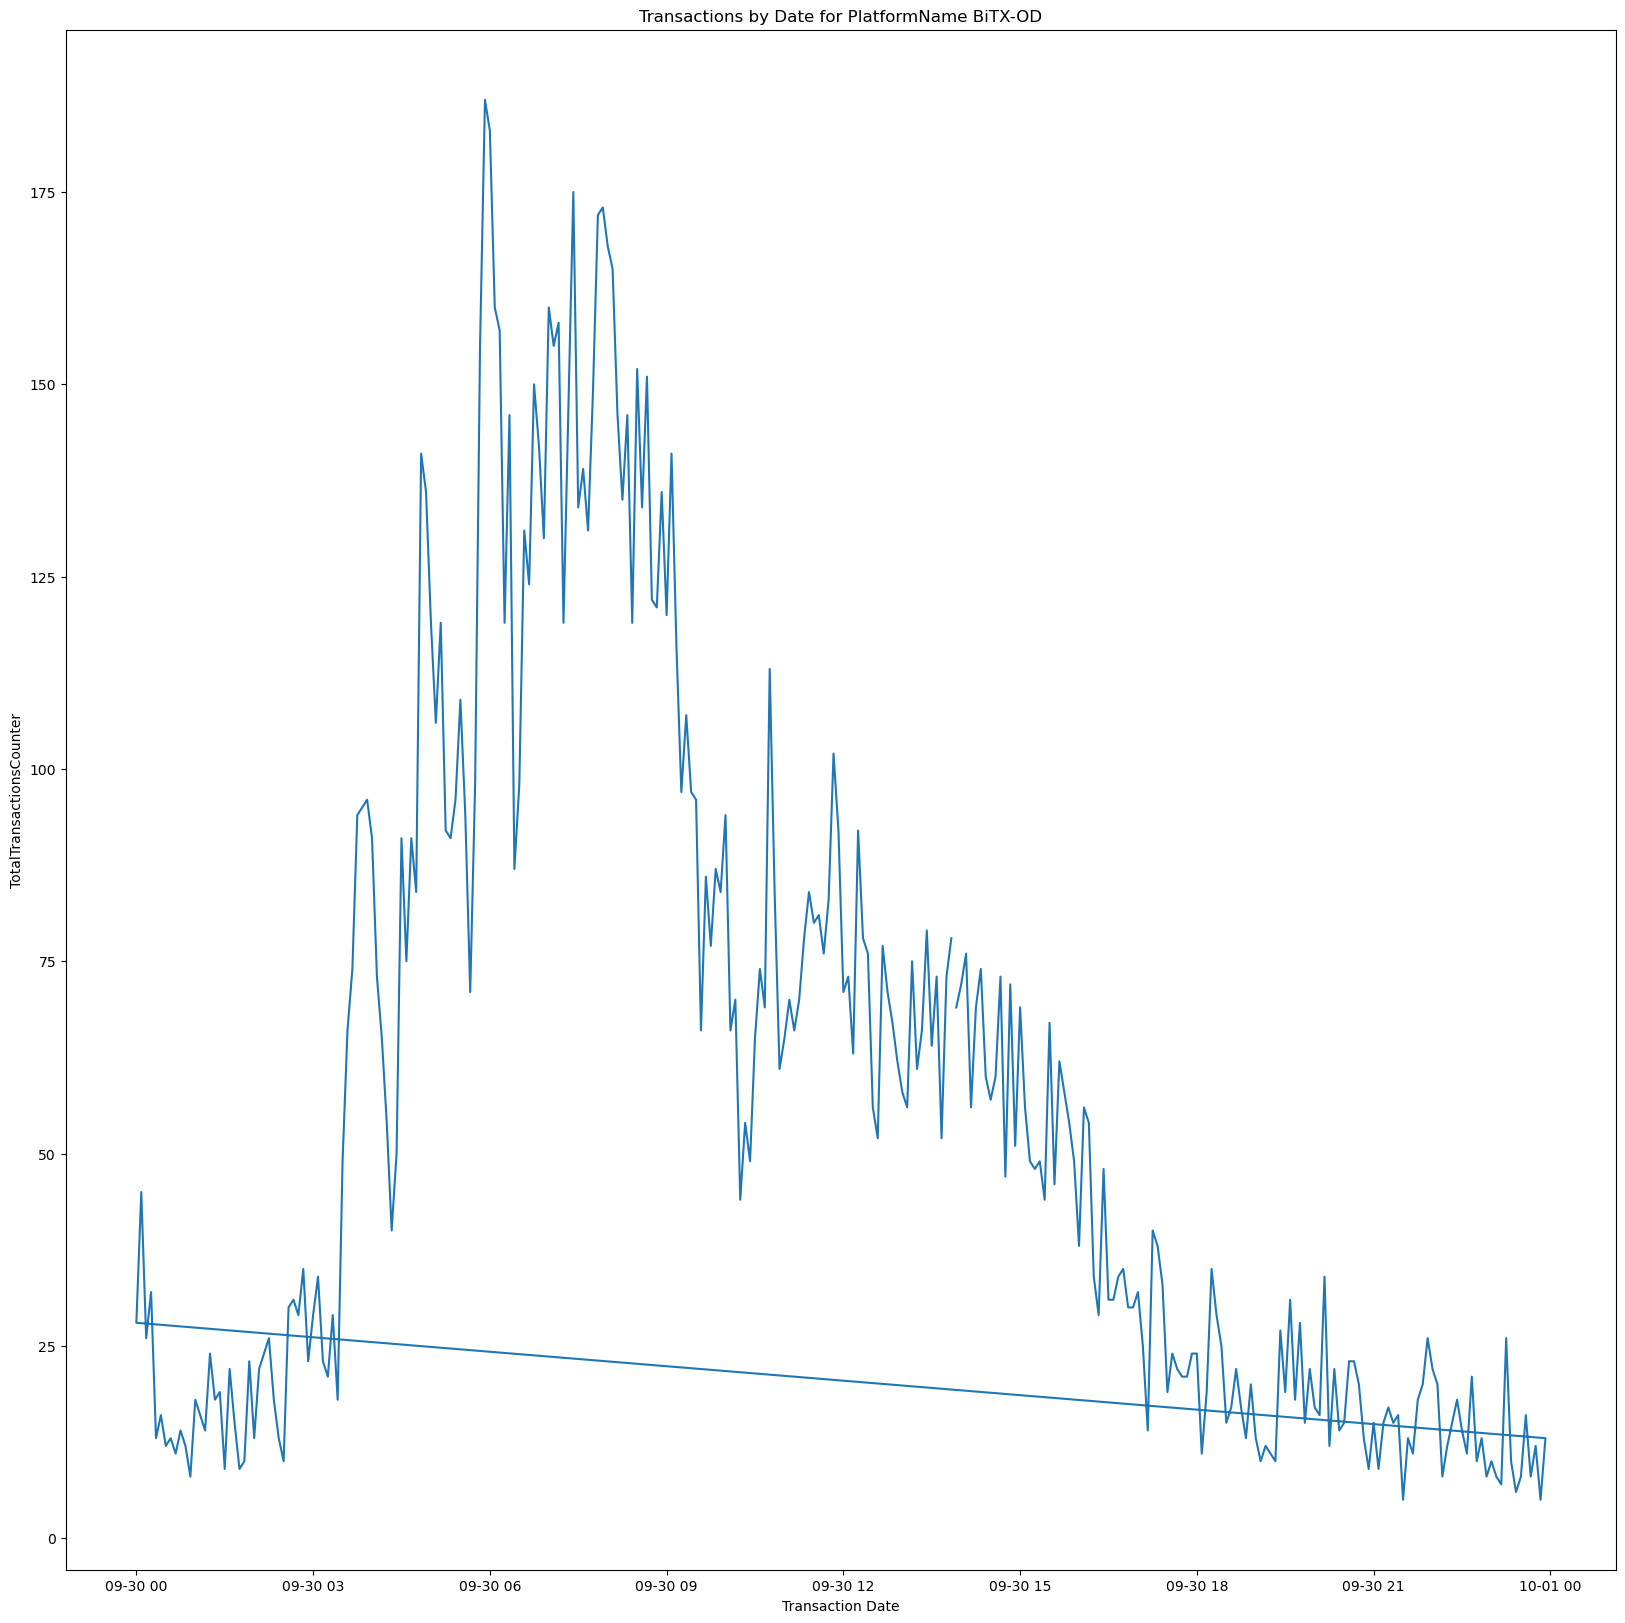

In [33]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatformBitx['ReferenceDate'], df_CoffeeCappTransByPlatformBitx['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName BiTX-OD')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [34]:
query = """
SELECT  day(ReferenceDate) as day
        ,[EK_PlatformId]
        ,[PlatformName]
        ,sum([TotalTransactionsCounter])
        ,sum([CompletedTransactionsCounter])
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'BiTX-OD' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
GROUP BY day(ReferenceDate), [EK_PlatformId], [PlatformName]
"""
df_CoffeeCappTransByPlatformBitx = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformBitx

,day,EK_PlatformId,PlatformName,,
0,30,1,BiTX-OD,16740,15173


### MobilepayStage

In [35]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayStage'
"""

df_CoffeeCappTransByPlatformMobile = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformMobile

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,7381,2022-12-04 05:35:00,3,MobilePayStage,0,0
1,7388,2022-12-04 05:40:00,3,MobilePayStage,0,0
2,7395,2022-12-04 05:45:00,3,MobilePayStage,0,0
3,7402,2022-12-04 05:50:00,3,MobilePayStage,0,0
4,7409,2022-12-04 05:55:00,3,MobilePayStage,0,0
...,...,...,...,...,...,...
90942,699451,2023-10-07 05:30:00,3,MobilePayStage,0,0
90943,699459,2023-10-07 05:35:00,3,MobilePayStage,0,0
90944,699467,2023-10-07 05:40:00,3,MobilePayStage,0,0
90945,699475,2023-10-07 05:45:00,3,MobilePayStage,0,0


In [36]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayStage' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatformMobile = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatformMobile

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684131,2023-09-30 13:55:00,3,MobilePayStage,0,0
1,684139,2023-09-30 14:00:00,3,MobilePayStage,0,0
2,684147,2023-09-30 14:05:00,3,MobilePayStage,0,0
3,684155,2023-09-30 14:10:00,3,MobilePayStage,0,0
4,684163,2023-09-30 14:15:00,3,MobilePayStage,0,0
...,...,...,...,...,...,...
283,685059,2023-09-30 23:35:00,3,MobilePayStage,0,0
284,685067,2023-09-30 23:40:00,3,MobilePayStage,0,0
285,685075,2023-09-30 23:45:00,3,MobilePayStage,0,0
286,685083,2023-09-30 23:50:00,3,MobilePayStage,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

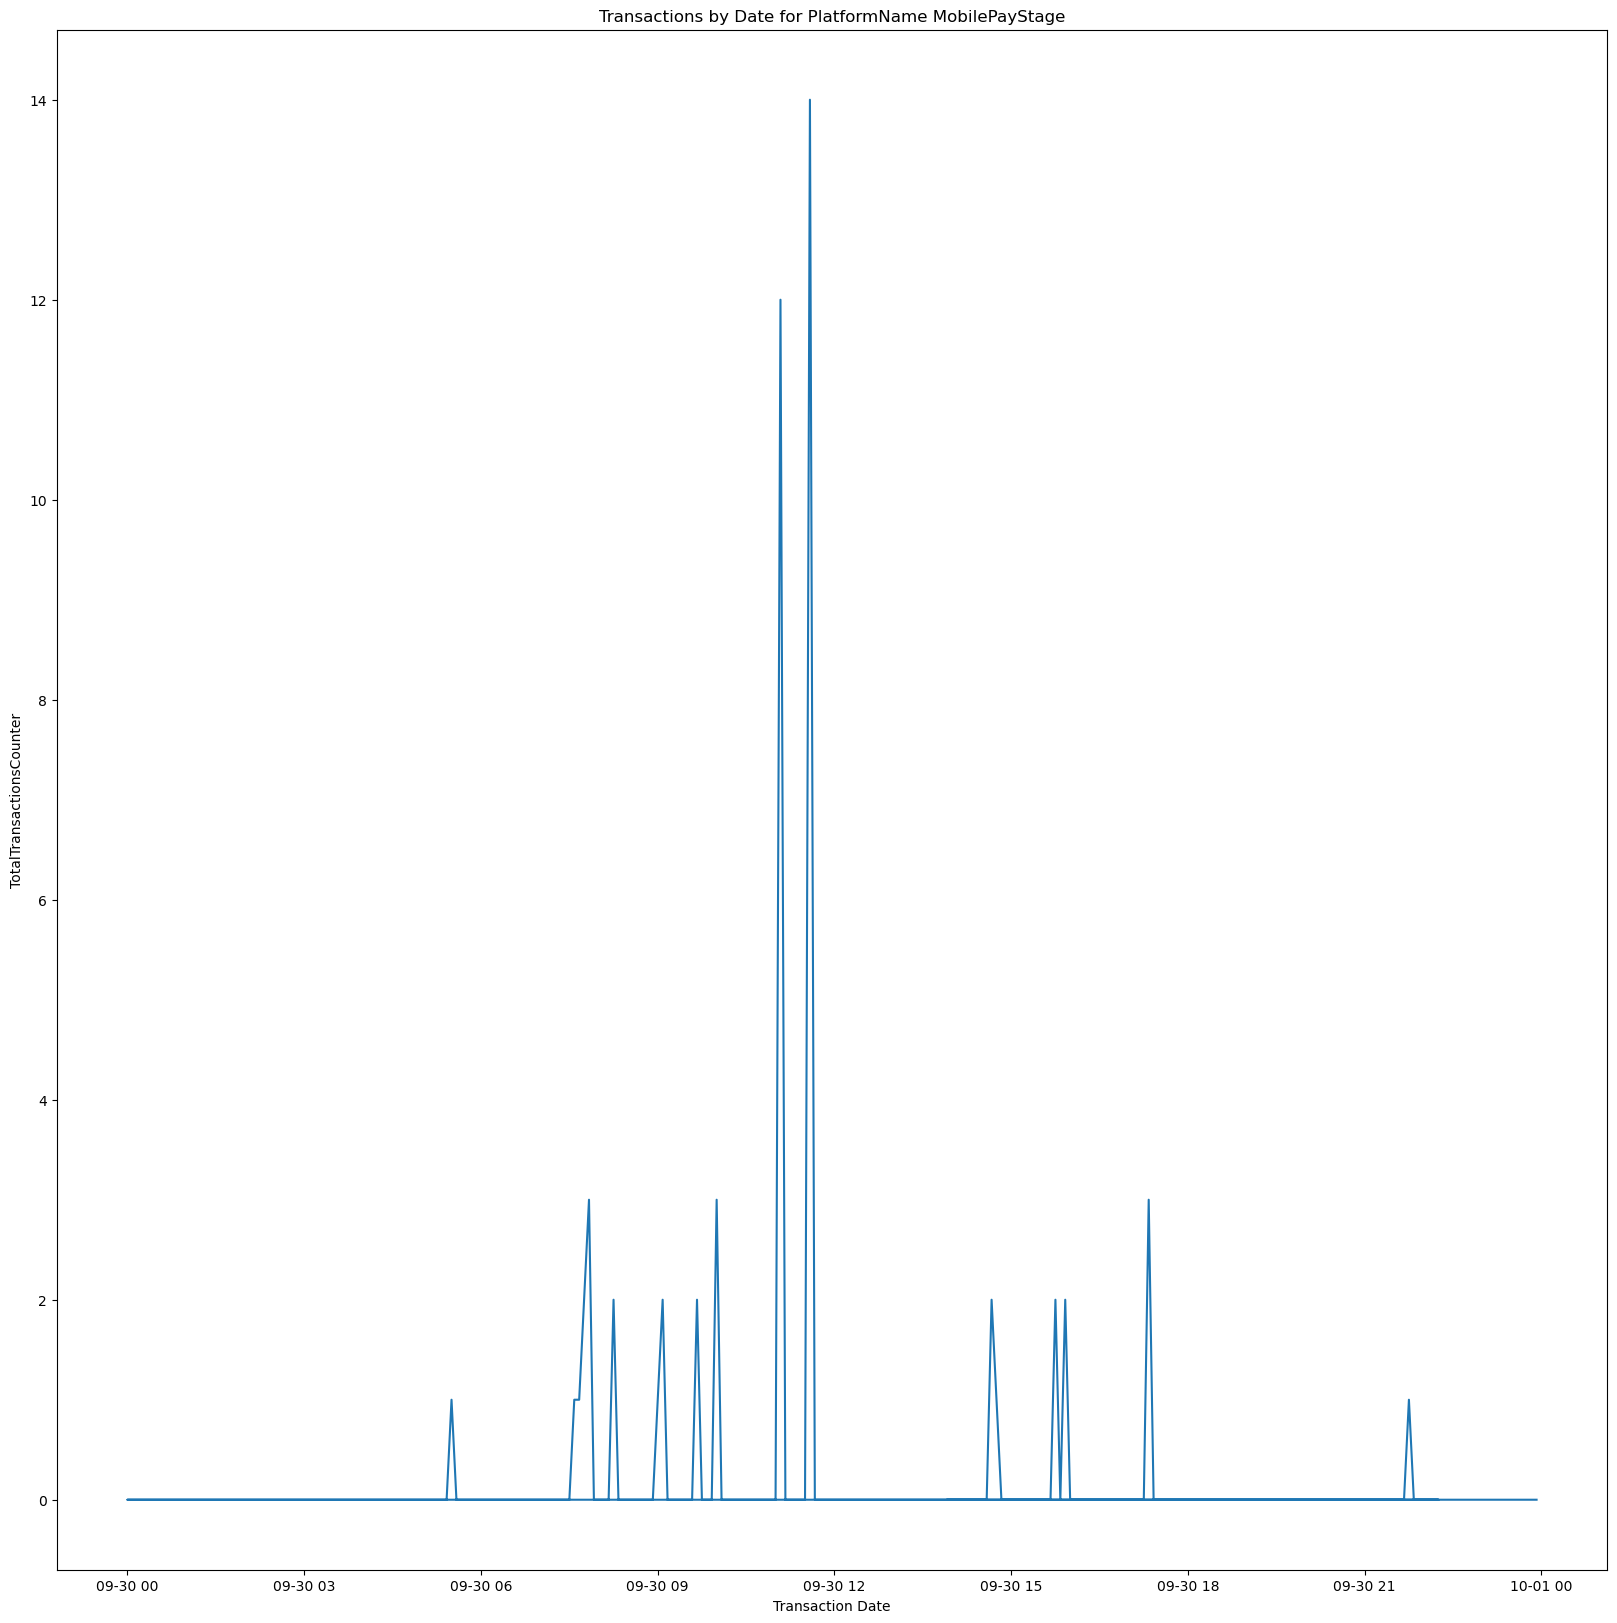

In [37]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatformMobile['ReferenceDate'], df_CoffeeCappTransByPlatformMobile['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePayStage')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [38]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform 

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,7380,2022-12-04 05:35:00,2,MobilePay,56,35
1,7387,2022-12-04 05:40:00,2,MobilePay,59,29
2,7394,2022-12-04 05:45:00,2,MobilePay,79,51
3,7401,2022-12-04 05:50:00,2,MobilePay,82,51
4,7408,2022-12-04 05:55:00,2,MobilePay,58,46
...,...,...,...,...,...,...
90942,706290,2023-10-10 04:45:00,2,MobilePay,316,282
90943,706298,2023-10-10 04:50:00,2,MobilePay,384,319
90944,706306,2023-10-10 04:55:00,2,MobilePay,370,318
90945,706314,2023-10-10 05:00:00,2,MobilePay,375,338


In [39]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684130,2023-09-30 13:55:00,2,MobilePay,203,159
1,684138,2023-09-30 14:00:00,2,MobilePay,216,175
2,684146,2023-09-30 14:05:00,2,MobilePay,208,187
3,684154,2023-09-30 14:10:00,2,MobilePay,190,147
4,684162,2023-09-30 14:15:00,2,MobilePay,184,146
...,...,...,...,...,...,...
283,684090,2023-09-30 13:30:00,2,MobilePay,210,167
284,684098,2023-09-30 13:35:00,2,MobilePay,199,156
285,684106,2023-09-30 13:40:00,2,MobilePay,196,162
286,684114,2023-09-30 13:45:00,2,MobilePay,167,137


Text(0, 0.5, 'TotalTransactionsCounter')

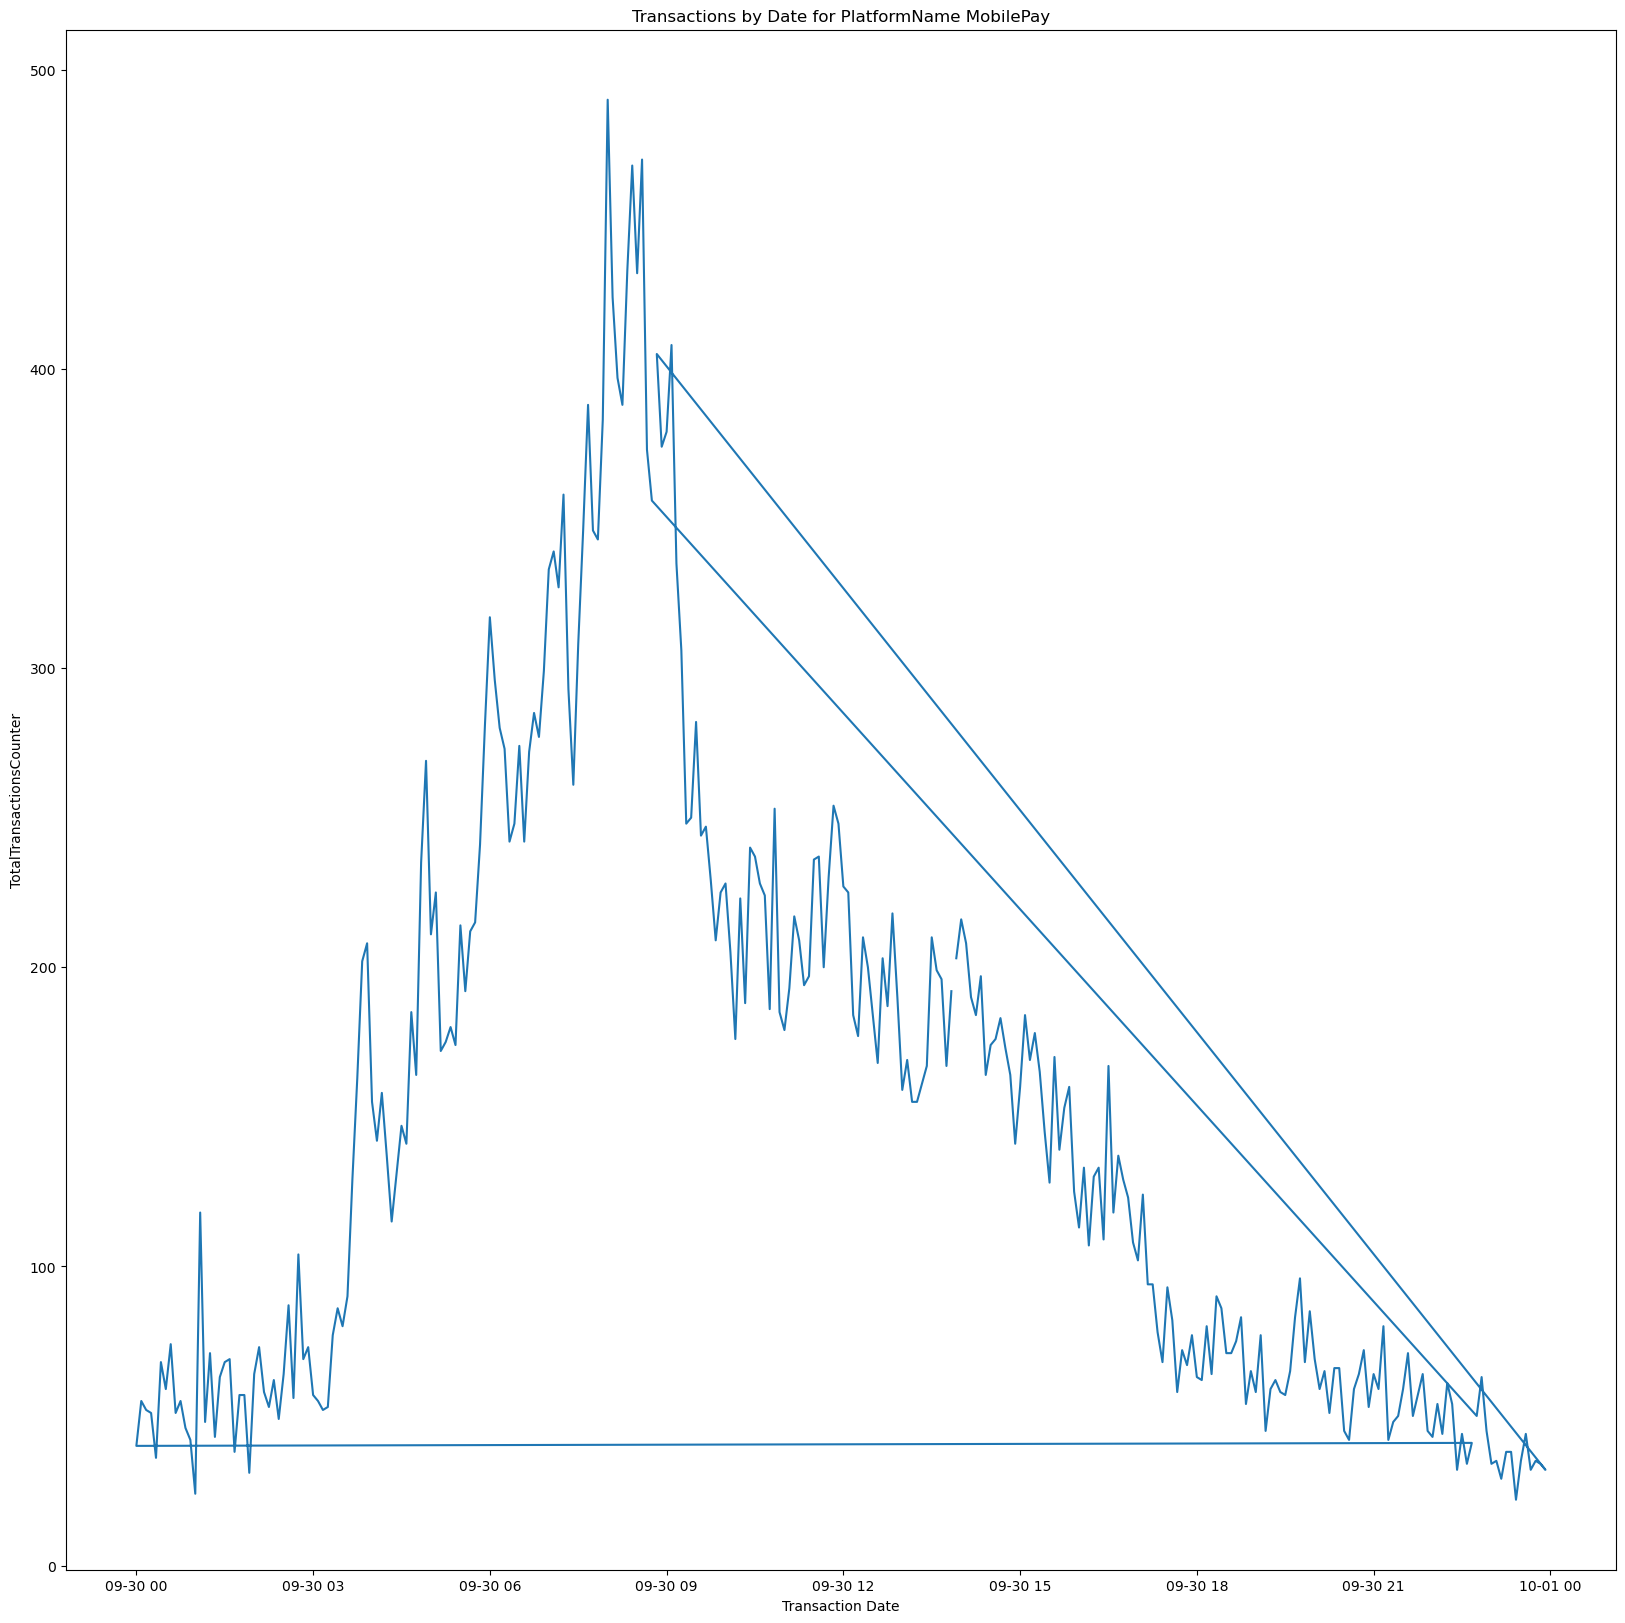

In [40]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePay')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [41]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePaySpain'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,22187,2022-12-11 13:50:00,4,MobilePaySpain,0,0
1,22194,2022-12-11 13:55:00,4,MobilePaySpain,0,0
2,22201,2022-12-11 14:00:00,4,MobilePaySpain,0,0
3,22208,2022-12-11 14:05:00,4,MobilePaySpain,0,0
4,22215,2022-12-11 14:10:00,4,MobilePaySpain,0,0
...,...,...,...,...,...,...
90942,428460,2023-06-15 22:45:00,4,MobilePaySpain,0,0
90943,428468,2023-06-15 22:50:00,4,MobilePaySpain,0,0
90944,428476,2023-06-15 22:55:00,4,MobilePaySpain,0,0
90945,428484,2023-06-15 23:00:00,4,MobilePaySpain,0,0


In [42]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePaySpain' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608860,2023-09-02 05:55:00,4,MobilePaySpain,0,0
1,608868,2023-09-02 06:00:00,4,MobilePaySpain,0,0
2,608876,2023-09-02 06:05:00,4,MobilePaySpain,0,0
3,608884,2023-09-02 06:10:00,4,MobilePaySpain,0,0
4,608892,2023-09-02 06:15:00,4,MobilePaySpain,0,0
...,...,...,...,...,...,...
8635,669572,2023-09-24 06:15:00,4,MobilePaySpain,0,0
8636,669580,2023-09-24 06:20:00,4,MobilePaySpain,0,0
8637,669588,2023-09-24 06:25:00,4,MobilePaySpain,0,0
8638,669596,2023-09-24 06:30:00,4,MobilePaySpain,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

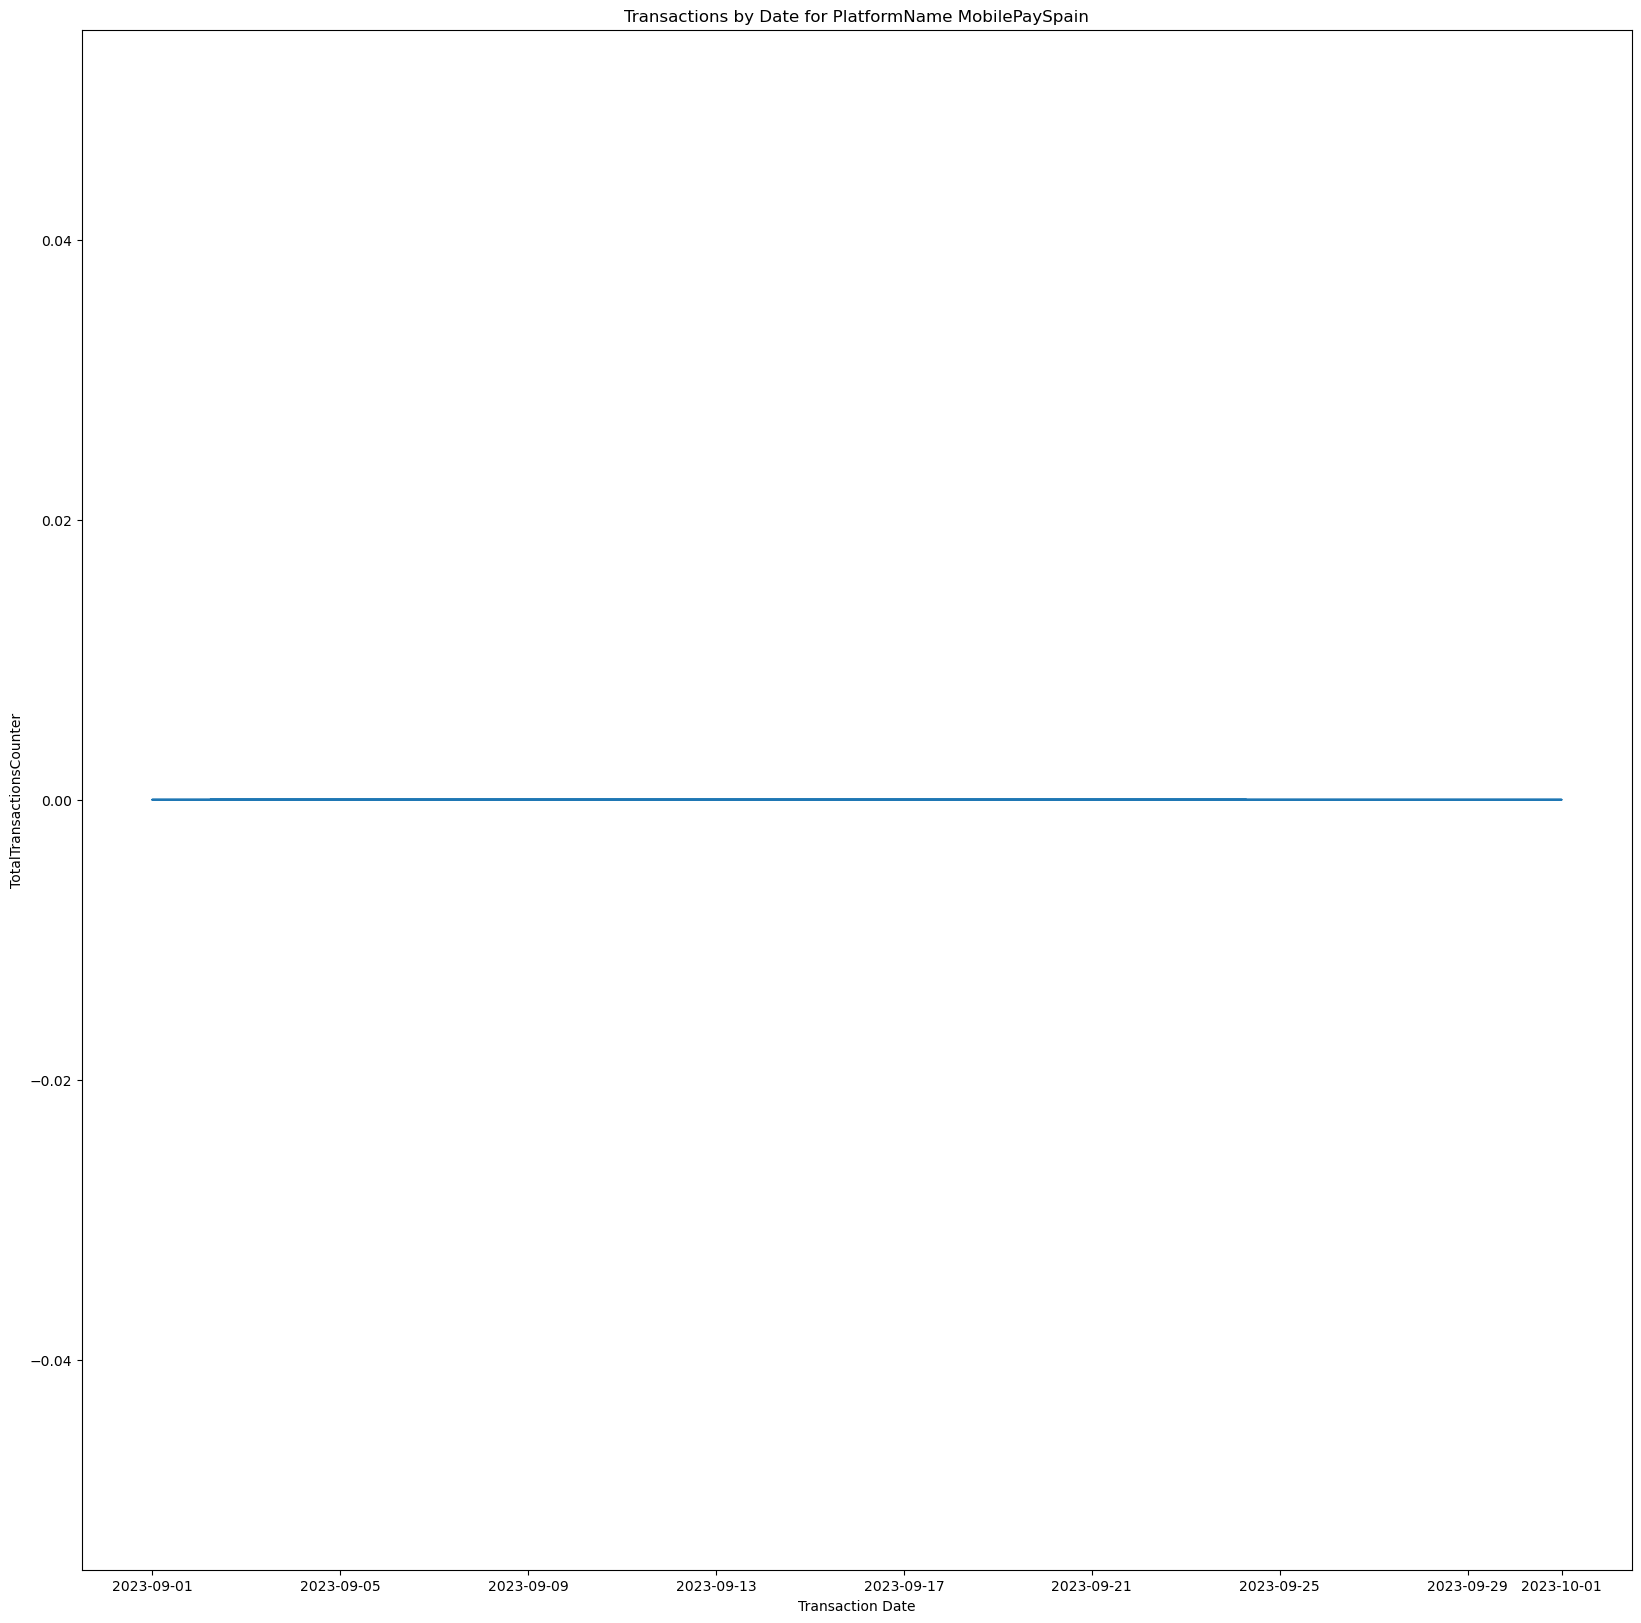

In [43]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePaySpain')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [44]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay-CPI'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,15000,2022-12-08 00:15:00,6,MobilePay-CPI,5,5
1,15007,2022-12-08 00:20:00,6,MobilePay-CPI,3,3
2,15014,2022-12-08 00:25:00,6,MobilePay-CPI,10,8
3,15021,2022-12-08 00:30:00,6,MobilePay-CPI,11,8
4,15028,2022-12-08 00:35:00,6,MobilePay-CPI,3,3
...,...,...,...,...,...,...
90942,655054,2023-09-17 23:00:00,6,MobilePay-CPI,19,15
90943,655062,2023-09-17 23:05:00,6,MobilePay-CPI,8,8
90944,655070,2023-09-17 23:10:00,6,MobilePay-CPI,14,7
90945,655078,2023-09-17 23:15:00,6,MobilePay-CPI,8,5


In [45]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePay-CPI' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684134,2023-09-30 13:55:00,6,MobilePay-CPI,30,28
1,684142,2023-09-30 14:00:00,6,MobilePay-CPI,21,20
2,684150,2023-09-30 14:05:00,6,MobilePay-CPI,16,14
3,684158,2023-09-30 14:10:00,6,MobilePay-CPI,22,19
4,684166,2023-09-30 14:15:00,6,MobilePay-CPI,22,19
...,...,...,...,...,...,...
283,684094,2023-09-30 13:30:00,6,MobilePay-CPI,8,8
284,684102,2023-09-30 13:35:00,6,MobilePay-CPI,20,19
285,684110,2023-09-30 13:40:00,6,MobilePay-CPI,29,22
286,684118,2023-09-30 13:45:00,6,MobilePay-CPI,26,25


Text(0, 0.5, 'TotalTransactionsCounter')

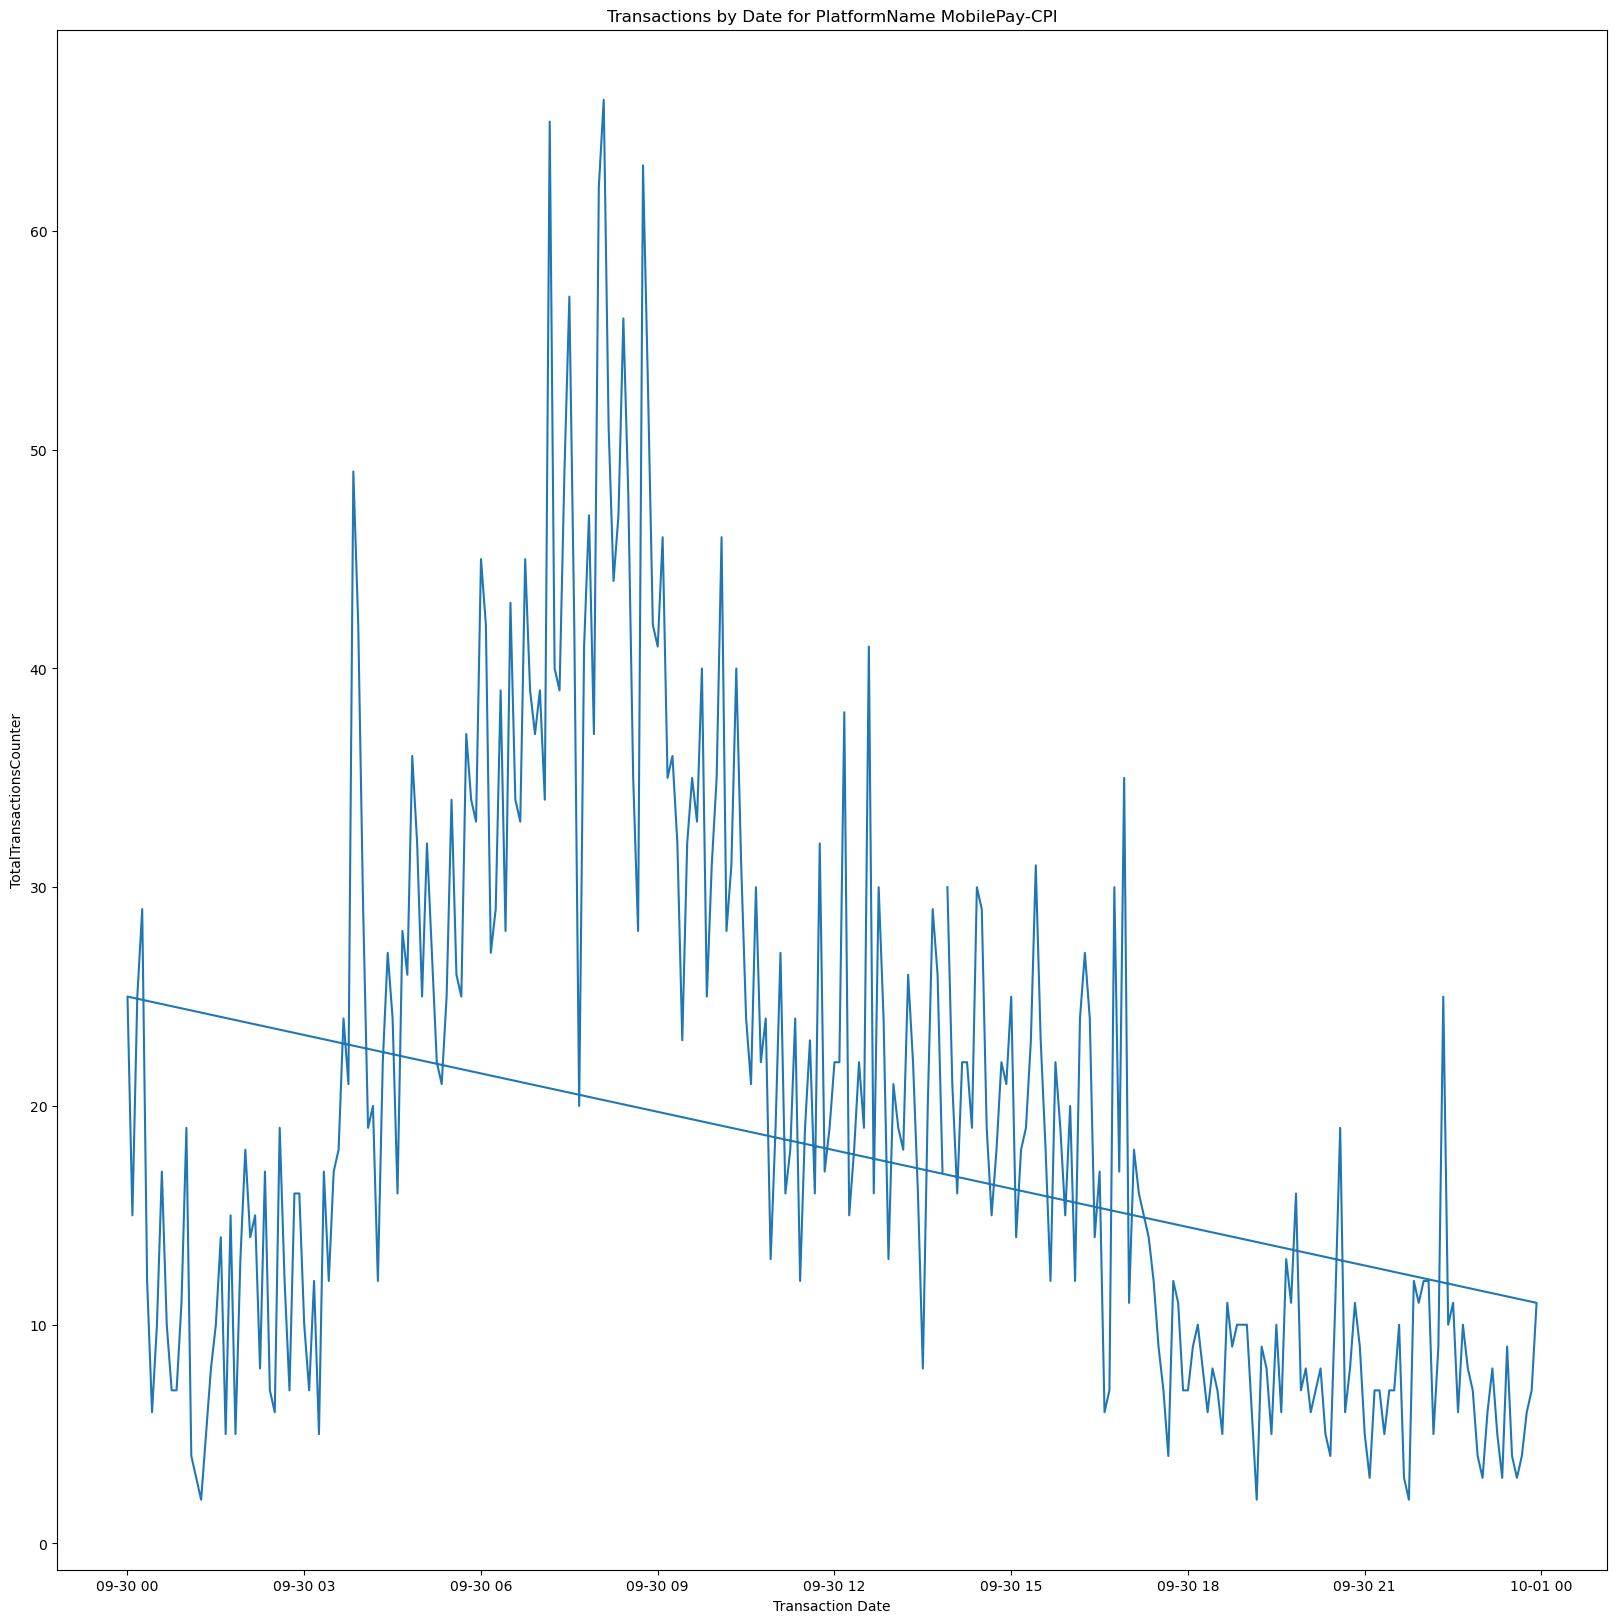

In [46]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePay-CPI')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [47]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Pickio'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,269856,2023-04-08 02:35:00,8,Pickio,0,0
1,269864,2023-04-08 02:40:00,8,Pickio,0,0
2,269872,2023-04-08 02:45:00,8,Pickio,0,0
3,269880,2023-04-08 02:50:00,8,Pickio,0,0
4,269888,2023-04-08 02:55:00,8,Pickio,0,0
...,...,...,...,...,...,...
54653,518576,2023-07-25 01:25:00,8,Pickio,0,0
54654,518584,2023-07-25 01:30:00,8,Pickio,0,0
54655,518592,2023-07-25 01:35:00,8,Pickio,0,0
54656,518600,2023-07-25 01:40:00,8,Pickio,0,0


In [48]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Pickio' AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608856,2023-09-02 05:50:00,8,Pickio,0,0
1,608864,2023-09-02 05:55:00,8,Pickio,0,0
2,608872,2023-09-02 06:00:00,8,Pickio,0,0
3,608880,2023-09-02 06:05:00,8,Pickio,0,0
4,608888,2023-09-02 06:10:00,8,Pickio,0,0
...,...,...,...,...,...,...
8635,669568,2023-09-24 06:10:00,8,Pickio,0,0
8636,669576,2023-09-24 06:15:00,8,Pickio,0,0
8637,669584,2023-09-24 06:20:00,8,Pickio,0,0
8638,669592,2023-09-24 06:25:00,8,Pickio,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

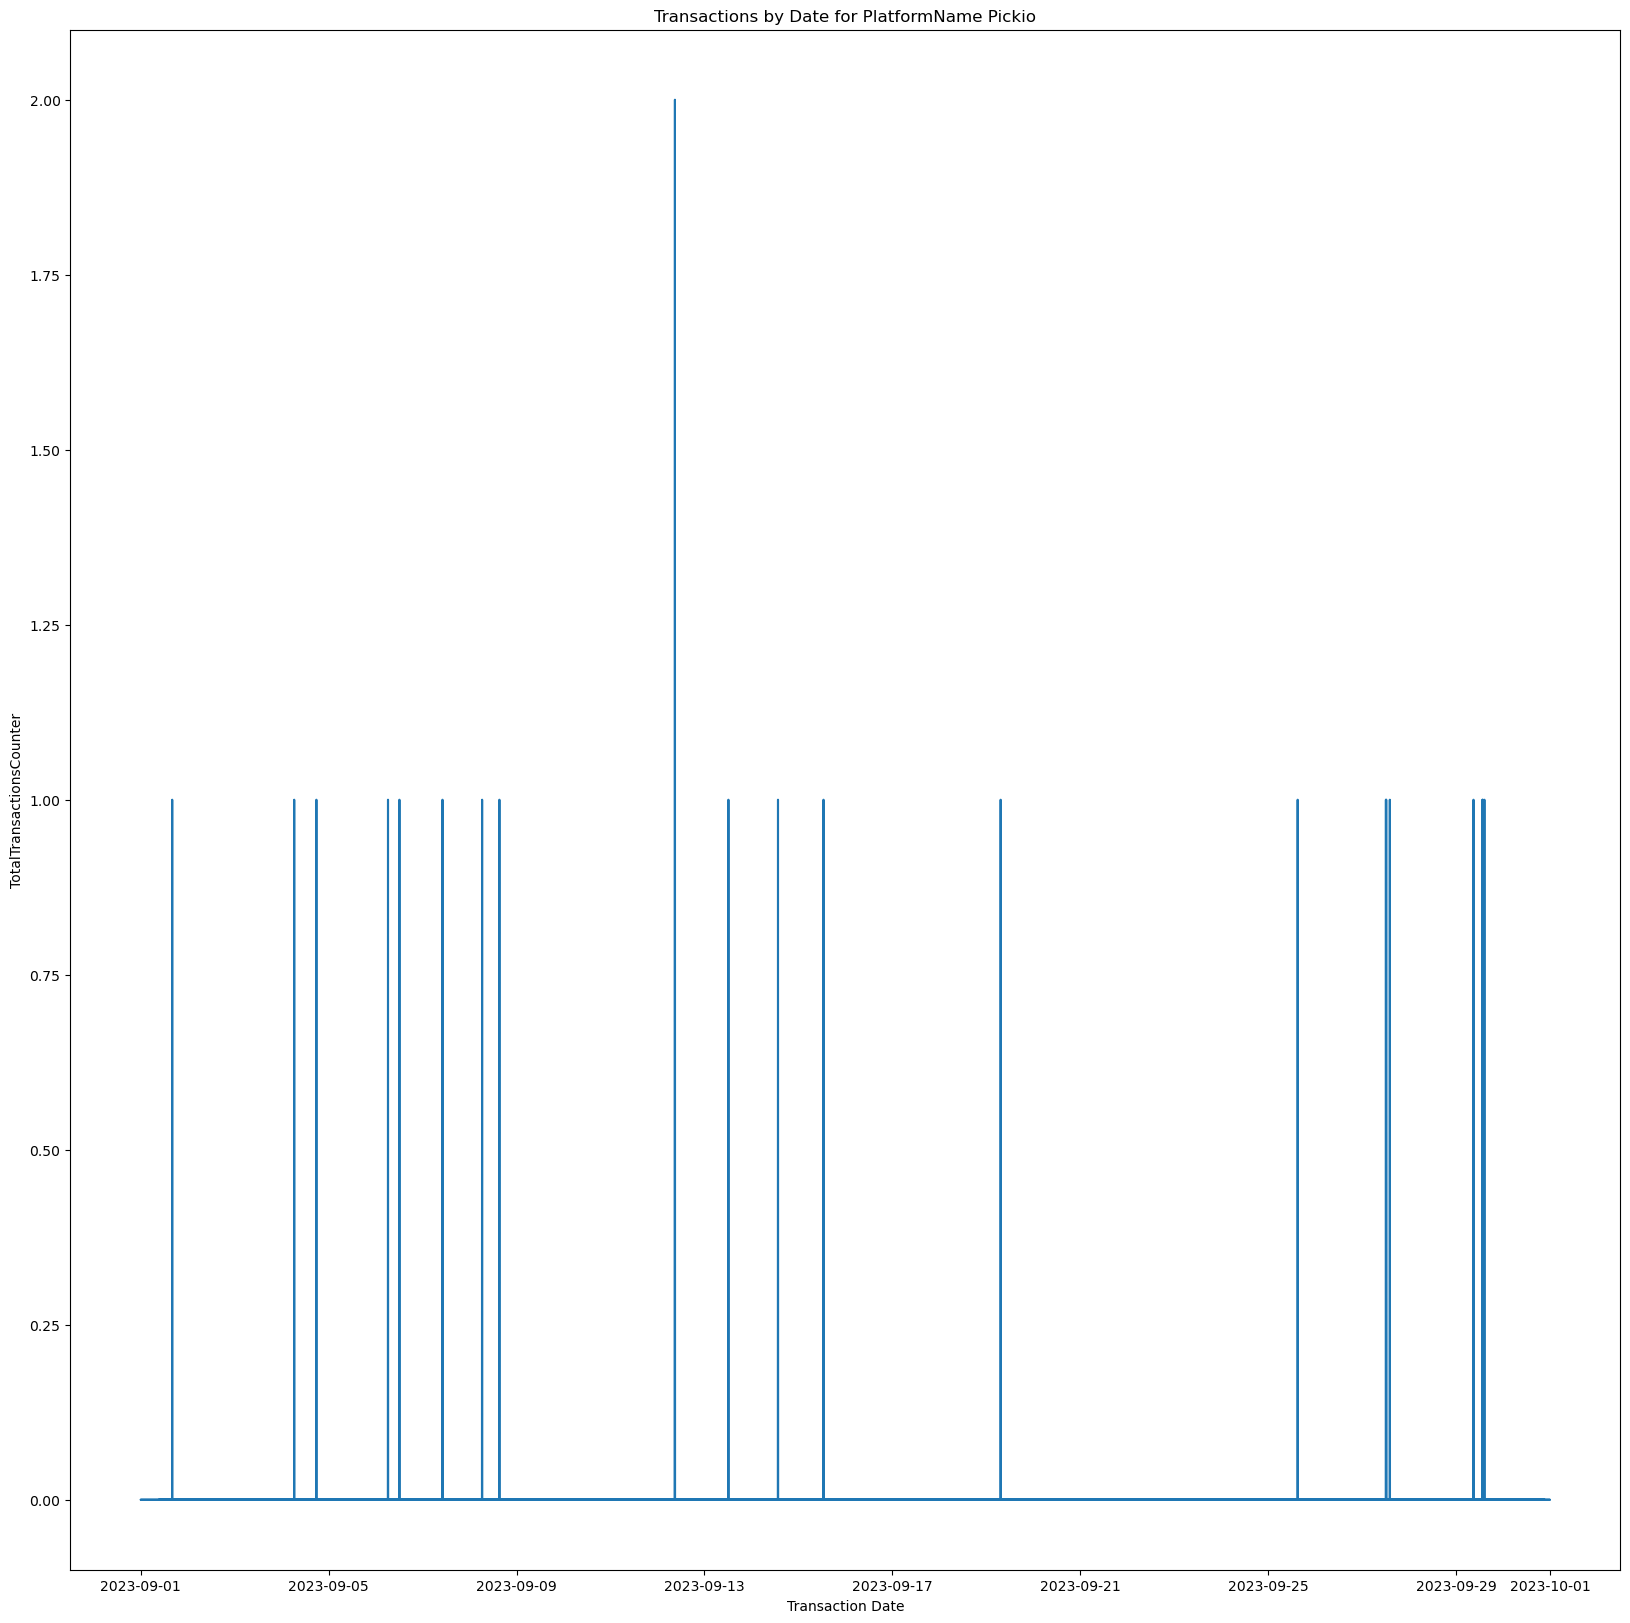

In [49]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName Pickio')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [50]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayFrance'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,5,2022-11-30 13:45:00,5,MobilePayFrance,0,0
1,12,2022-11-30 13:50:00,5,MobilePayFrance,0,0
2,19,2022-11-30 13:55:00,5,MobilePayFrance,0,0
3,26,2022-11-30 14:00:00,5,MobilePayFrance,0,0
4,33,2022-11-30 14:05:00,5,MobilePayFrance,0,0
...,...,...,...,...,...,...
90942,647373,2023-09-14 15:00:00,5,MobilePayFrance,0,0
90943,647381,2023-09-14 15:05:00,5,MobilePayFrance,0,0
90944,647389,2023-09-14 15:10:00,5,MobilePayFrance,0,0
90945,647397,2023-09-14 15:15:00,5,MobilePayFrance,0,0


In [51]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'MobilePayFrance' AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,608861,2023-09-02 05:55:00,5,MobilePayFrance,0,0
1,608869,2023-09-02 06:00:00,5,MobilePayFrance,0,0
2,608877,2023-09-02 06:05:00,5,MobilePayFrance,0,0
3,608885,2023-09-02 06:10:00,5,MobilePayFrance,0,0
4,608893,2023-09-02 06:15:00,5,MobilePayFrance,0,0
...,...,...,...,...,...,...
8635,669573,2023-09-24 06:15:00,5,MobilePayFrance,0,0
8636,669581,2023-09-24 06:20:00,5,MobilePayFrance,0,0
8637,669589,2023-09-24 06:25:00,5,MobilePayFrance,0,0
8638,669597,2023-09-24 06:30:00,5,MobilePayFrance,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

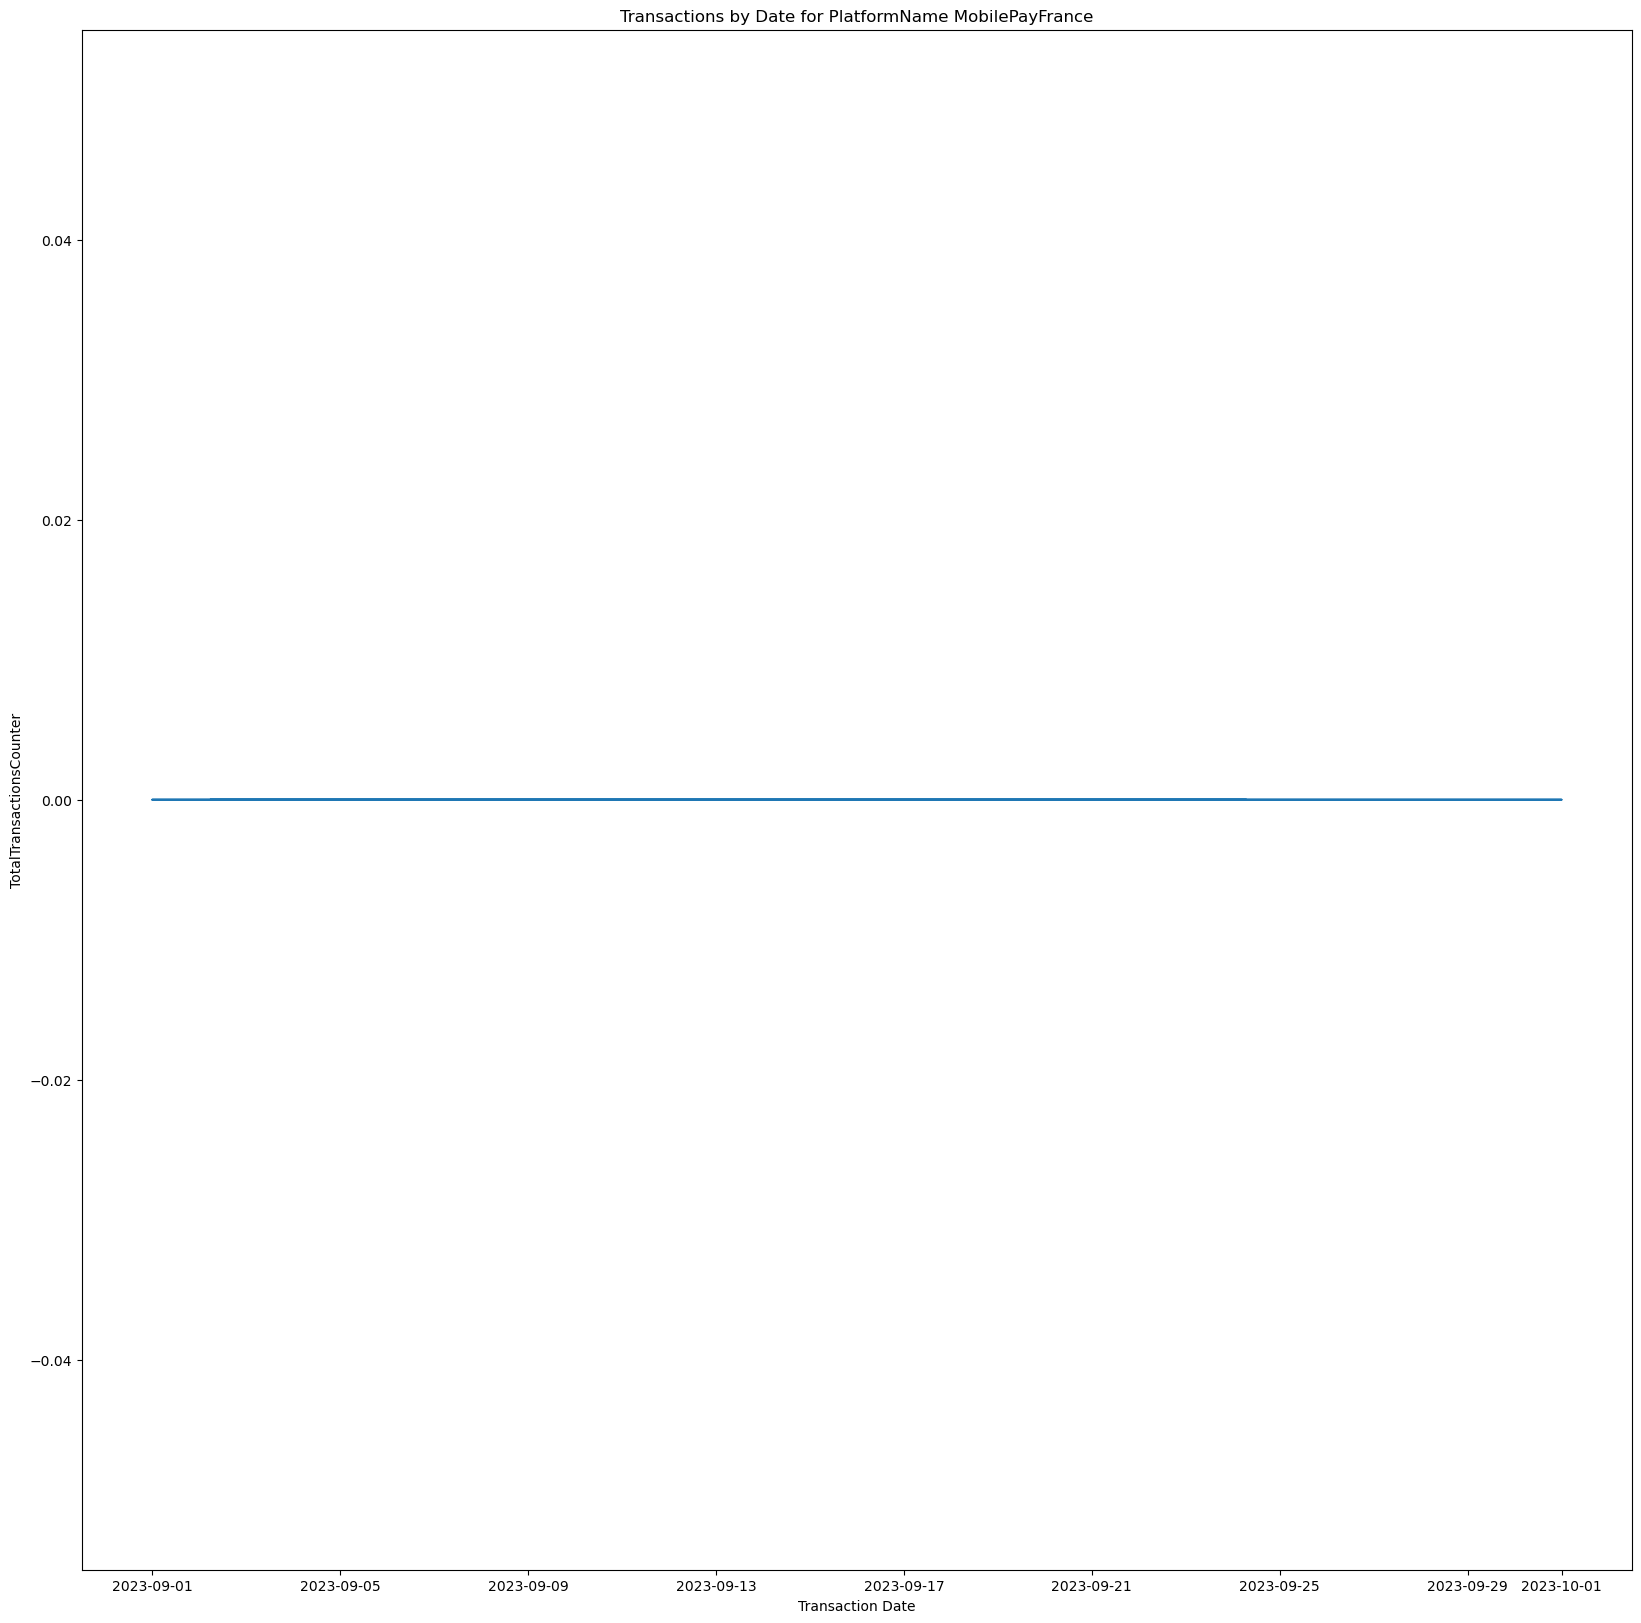

In [52]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName MobilePayFrance')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [53]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Coges'
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,7,2022-11-30 13:45:00,7,Coges,81,58
1,14,2022-11-30 13:50:00,7,Coges,74,61
2,21,2022-11-30 13:55:00,7,Coges,49,38
3,28,2022-11-30 14:00:00,7,Coges,70,57
4,35,2022-11-30 14:05:00,7,Coges,65,59
...,...,...,...,...,...,...
90942,711239,2023-10-12 08:15:00,7,Coges,336,292
90943,711247,2023-10-12 08:20:00,7,Coges,272,229
90944,711255,2023-10-12 08:25:00,7,Coges,236,223
90945,711263,2023-10-12 08:30:00,7,Coges,257,239


In [54]:
query = """
SELECT  [PK_CoffeeCappTransByPlatformInstantKpisId]
        ,[ReferenceDate]
        ,[EK_PlatformId]
        ,[PlatformName]
        ,[TotalTransactionsCounter]
        ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByPlatformInstantKpis]
WHERE PlatformName = 'Coges' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)= 30
"""

df_CoffeeCappTransByPlatform = pd.read_sql(query, engine)
df_CoffeeCappTransByPlatform

,PK_CoffeeCappTransByPlatformInstantKpisId,ReferenceDate,EK_PlatformId,PlatformName,TotalTransactionsCounter,CompletedTransactionsCounter
0,684127,2023-09-30 13:50:00,7,Coges,43,41
1,684135,2023-09-30 13:55:00,7,Coges,35,33
2,684143,2023-09-30 14:00:00,7,Coges,27,25
3,684151,2023-09-30 14:05:00,7,Coges,30,25
4,684159,2023-09-30 14:10:00,7,Coges,27,22
...,...,...,...,...,...,...
283,684087,2023-09-30 13:25:00,7,Coges,28,28
284,684095,2023-09-30 13:30:00,7,Coges,13,12
285,684103,2023-09-30 13:35:00,7,Coges,49,38
286,684111,2023-09-30 13:40:00,7,Coges,21,12


Text(0, 0.5, 'TotalTransactionsCounter')

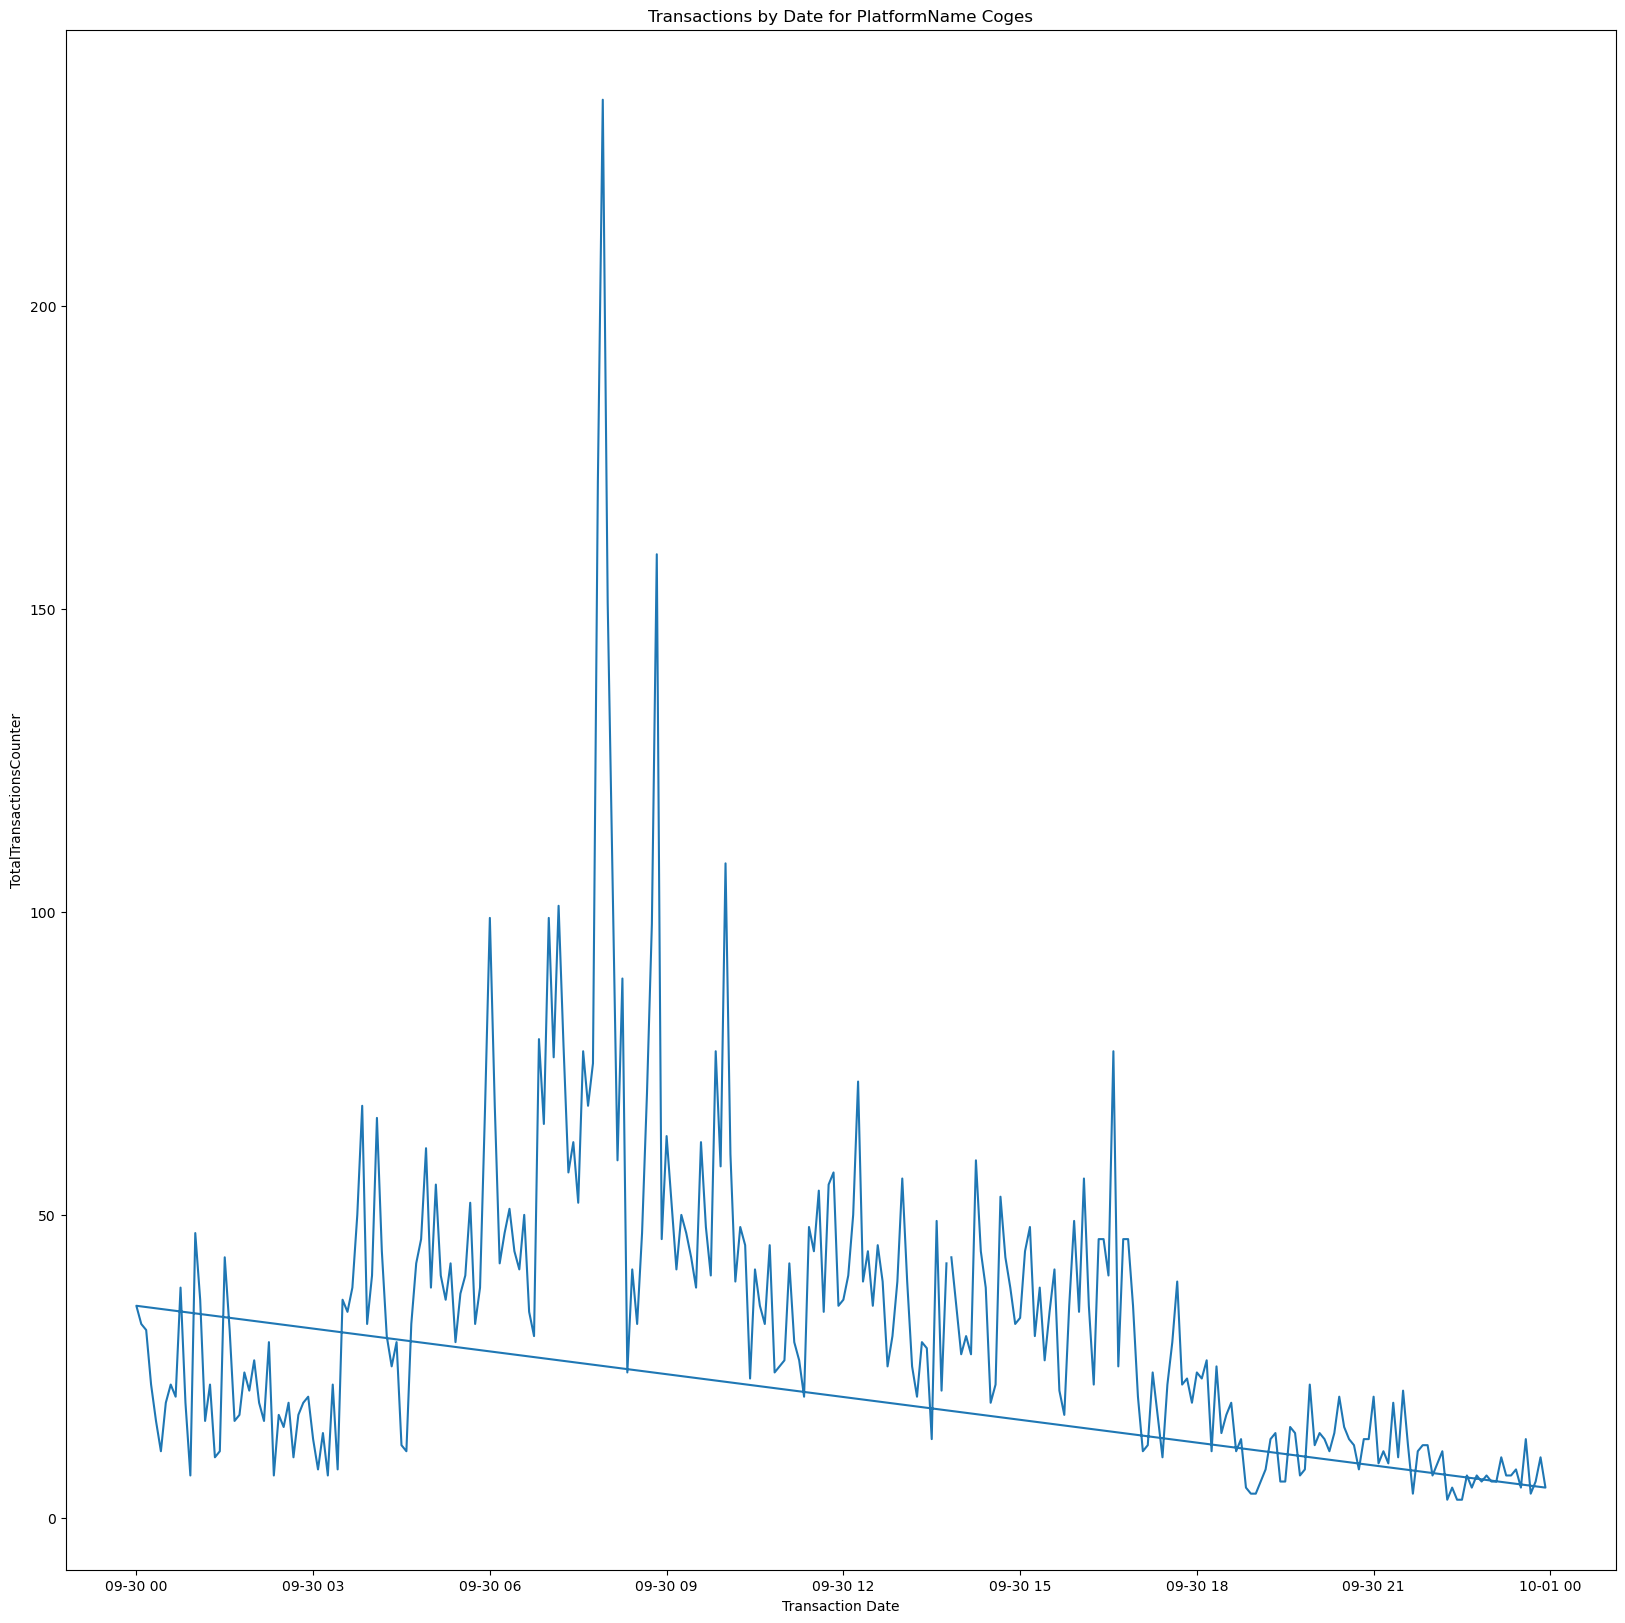

: 

In [55]:
plt.figure(figsize=(20, 20))

# Plotting the timeseries graph of given dataset
plt.plot(df_CoffeeCappTransByPlatform['ReferenceDate'], df_CoffeeCappTransByPlatform['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for PlatformName Coges')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')